# Import Libraries and Dataset

In [69]:
# for basic operations
import numpy as np
import pandas as pd

#for visualizations
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas import plotting
import matplotlib.style as style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
%matplotlib inline
import missingno as msno

# from pandas_profiling import ProfileReport
from pandas.plotting import parallel_coordinates
from IPython.display import display, Markdown

# for providing path
import os
#from google.colab import drive
#drive.mount('/content/drive')
#default_dir = "/content/drive/MyDrive/Colab Notebooks/Final_Project"
#os.chdir(default_dir)

#for Feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# for model preparation
import sklearn
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#for modelling
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from keras.models import Sequential
from keras.layers import Dense

#Evaluation
from sklearn.metrics import confusion_matrix,RocCurveDisplay, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#Save model
import joblib
import warnings
import pickle
warnings.filterwarnings('ignore')

In [70]:
#Load dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Basic Exploration

In [3]:
def describe_detail(df):
    # Display function with Markdown for titles
    def display_markdown(title):
        display(Markdown(f"**{title}**"))

    # (a) First five data points
    display_markdown('First five data points')
    display(df.head())
    print('\n')

    # (b) Random five data points
    display_markdown('Random five data points')
    display(df.sample(5))
    print('\n')

    # (c) Last five data points
    display_markdown('Last five data points')
    display(df.tail())
    print('\n')

    # (d) Shape and Size of data set
    shape_size_df = pd.DataFrame({'Shape': [df.shape], 'Size': [df.size]})
    display_markdown('Shape and Size of dataset')
    display(shape_size_df)
    print('\n')

    # (e) Data types
    data_types_df = pd.DataFrame(df.dtypes, columns=['Data Type'])
    display_markdown('Data types of columns')
    display(data_types_df)
    print('\n')

    # (f) Numerical features in the dataset
    numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
    if numerical_features:
        display_markdown('Numerical features in the dataset')
        display(numerical_features)
        print('\n')

    # (g) Categorical features in the dataset
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if categorical_features:
        display_markdown('Categorical features in the dataset')
        display(categorical_features)
        print('\n')
    else:
       display_markdown('**No object/category data in dataset.**')
       print('\n')

    # (h) Statistical Description of Columns
    if numerical_features:
        display_markdown('Statistical Description of Numerical Columns')
        display(df.describe().T)
        print('\n')

    # (i) Description of Categorical features
    if categorical_features:
        display_markdown('Description of Categorical Features')
        display(df.describe(include=['object', 'category']))
        print('\n')

    # (j) Unique class count of Categorical features
    if categorical_features:
        unique_counts_df = pd.DataFrame(df[categorical_features].nunique(), columns=['Unique Count'])
        display_markdown('Unique class count of Categorical features')
        display(unique_counts_df)
        print('\n')

    # (k) Missing values in data
    missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])
    missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]
    if not missing_values_df.empty:
        display_markdown('Missing values in data')
        display(missing_values_df)
    else:
        display_markdown('**No missing values found.**')
        display(df.isnull().sum())
        print('\n')

    # (l) Unique Value Counts
    unique_values = {}
    for col in df.columns:
        unique_values[col] = df[col].nunique()

    unique_value_counts = pd.DataFrame(unique_values, index=['unique value count']).transpose()

    display_markdown('**Unique Value Counts**')
    display(unique_value_counts)

describe_detail(df)

**First five data points**

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

**Random five data points**

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
55323               1.0     1.0       1.0        1.0  35.0     1.0     0.0   
243810              0.0     1.0       1.0        1.0  25.0     0.0     0.0   
252528              0.0     0.0       0.0        1.0  31.0     0.0     0.0   
64638               0.0     1.0       1.0        1.0  25.0     1.0     1.0   
172185              0.0     0.0       0.0        1.0  18.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
55323                    0.0           0.0     0.0  ...            1.0   
243810                   0.0           0.0     1.0  ...            1.0   
252528                   0.0           0.0     1.0  ...            1.0   
64638                    1.0           0.0     1.0  ...            1.0   
172185                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
55323           0.0      4.0       0.0       0.0       1.0  0.0  11.0   
243810          0.0      2.0       0.0       0.0       0.0  0.0  12.0   
252528          0.0      5.0      15.0      30.0       1.0  1.0   4.0   
64638           0.0      3.0       0.0       0.0       1.0  1.0  13.0   
172185          1.0      2.0      15.0       0.0       0.0  0.0   8.0   

        Education  Income  
55323         4.0     3.0  
243810        6.0     3.0  
252528        5.0     3.0  
64638         4.0     6.0  
172185        6.0     5.0  

[5 rows x 22 columns]

**Last five data points**

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[5 rows x 22 columns]

**Shape and Size of dataset**

Shape     Size
0  (253680, 22)  5580960

**Data types of columns**

Data Type
Diabetes_binary        float64
HighBP                 float64
HighChol               float64
CholCheck              float64
BMI                    float64
Smoker                 float64
Stroke                 float64
HeartDiseaseorAttack   float64
PhysActivity           float64
Fruits                 float64
Veggies                float64
HvyAlcoholConsump      float64
AnyHealthcare          float64
NoDocbcCost            float64
GenHlth                float64
MentHlth               float64
PhysHlth               float64
DiffWalk               float64
Sex                    float64
Age                    float64
Education              float64
Income                 float64

**Numerical features in the dataset**

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

****No object/category data in dataset.****

**Statistical Description of Numerical Columns**

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       253680.0   0.139333  0.346294   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

****No missing values found.****

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

****Unique Value Counts****

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [5]:
#Create HTML Report
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
report = ProfileReport(df, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Save the report in file
report.to_file("final_project_eda_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Check Data Distributions

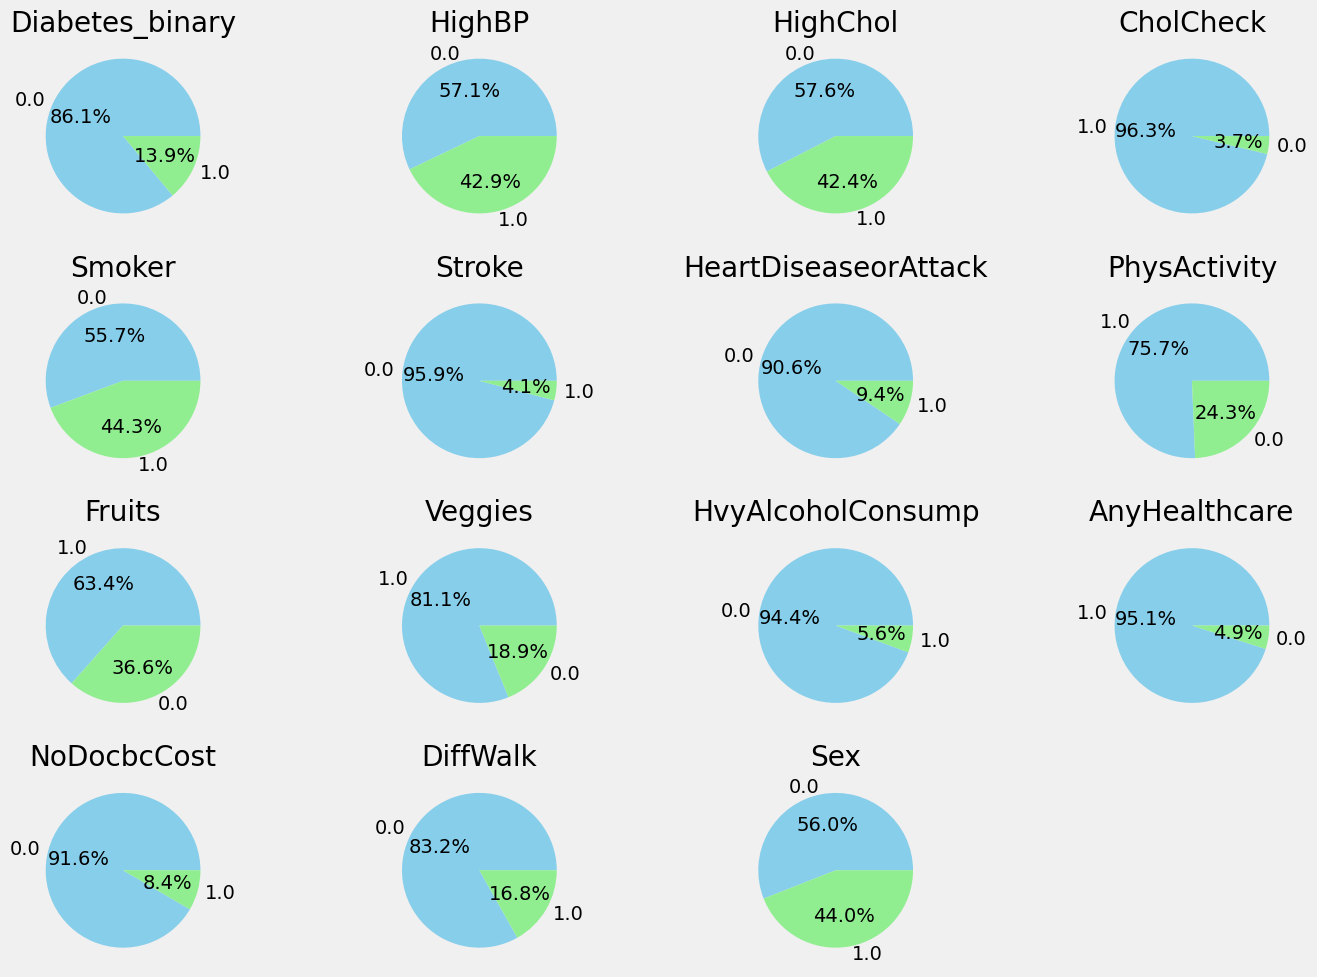

In [11]:
variabel_biner = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
                  'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                  'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# Buat pie chart untuk setiap variabel biner
plt.figure(figsize=(15, 10))
for var in variabel_biner:
    plt.subplot(4, 4, variabel_biner.index(var) + 1)
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(var)
    plt.ylabel('')

plt.savefig("binary_pie.jpeg")
plt.tight_layout()
plt.show()

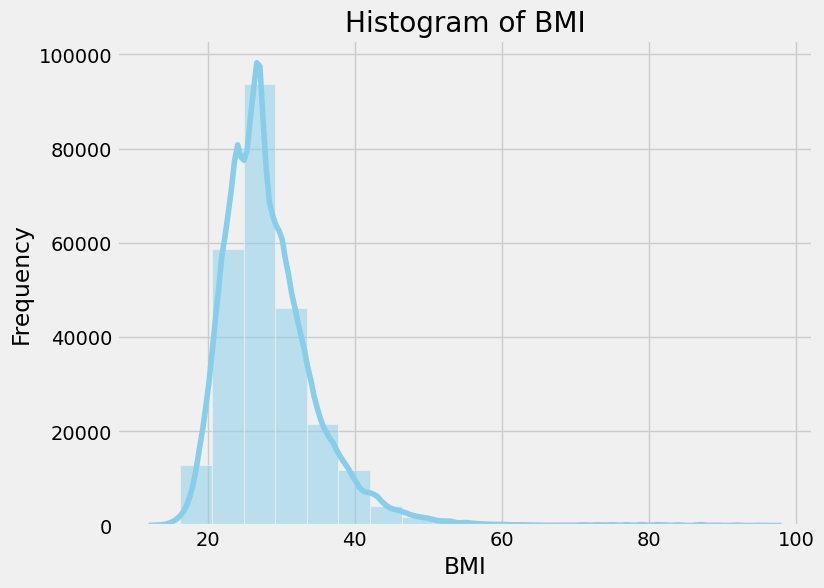

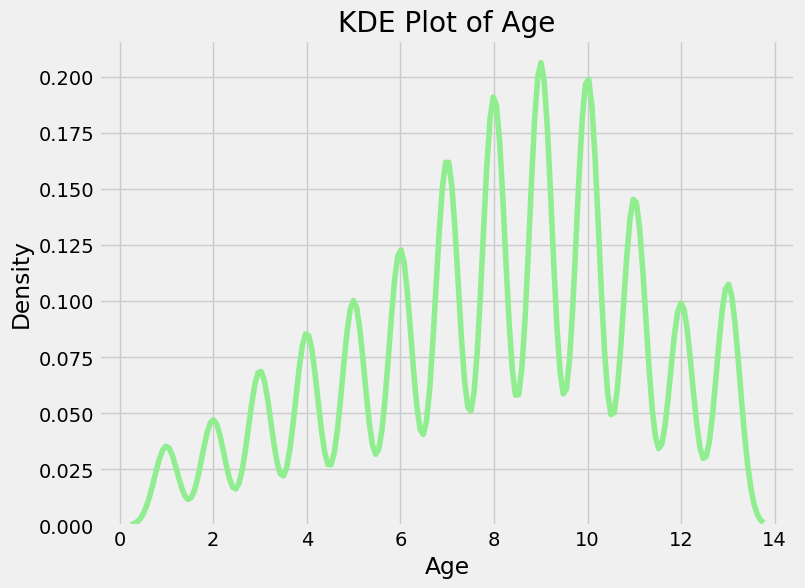

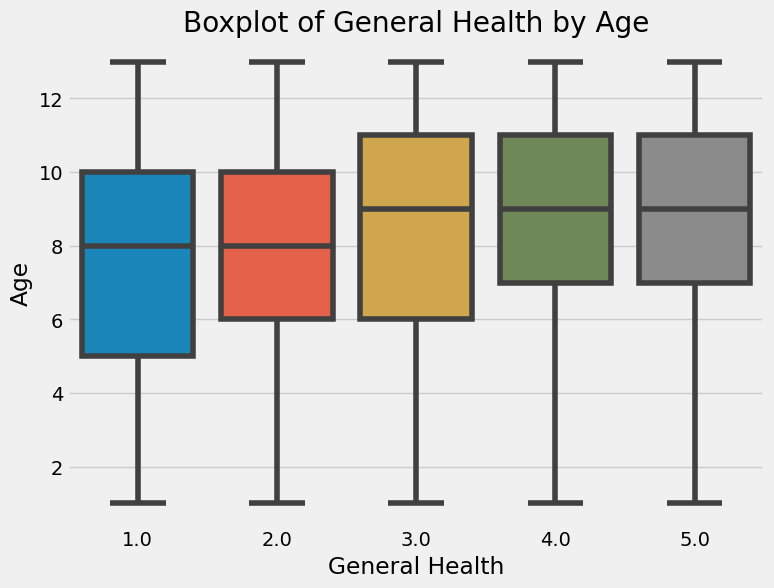

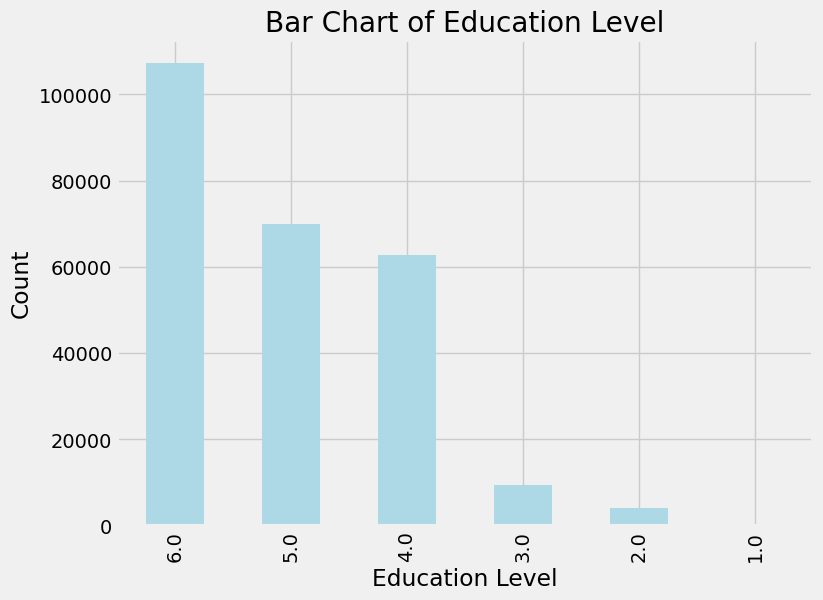

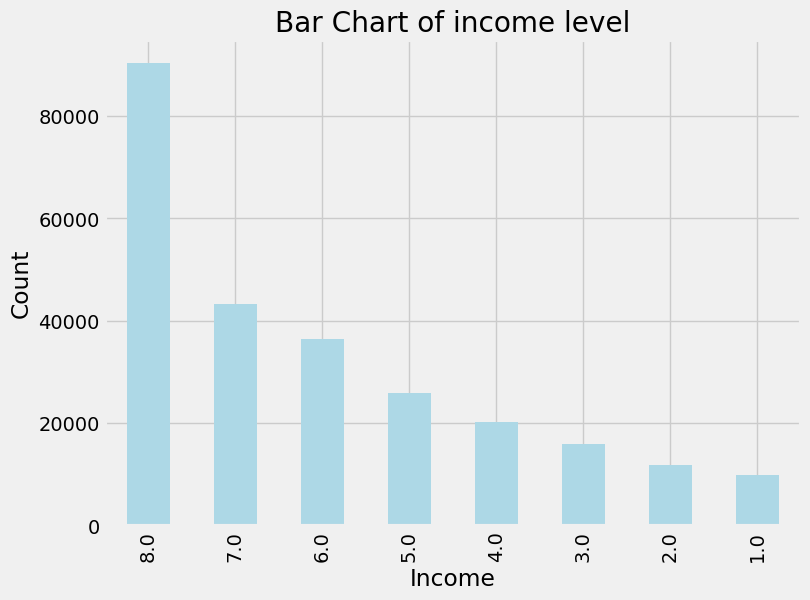

In [12]:

plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='skyblue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='GenHlth', y='Age', data=df)
plt.xlabel('General Health')
plt.ylabel('Age')
plt.title('Boxplot of General Health by Age')
plt.show()

plt.figure(figsize=(8, 6))
df['Education'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Bar Chart of Education Level')
plt.show()

plt.figure(figsize=(8, 6))
df['Income'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Bar Chart of income level')
plt.show()

**Normality Test**

In [13]:
from scipy.stats import shapiro

# uji normalitas untuk variabel 'BMI'
stat, p = shapiro(df['BMI'])

print("Shapiro-Wilk Test for BMI:")
print("Test Statistic:", stat)
print("p-value:", p)

alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")
    print('\n')

# uji normalitas untuk variabel 'Income'
stat, p = shapiro(df['Income'])

print("Shapiro-Wilk Test for Income:")
print("Test Statistic:", stat)
print("p-value:", p)

alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")

Shapiro-Wilk Test for BMI:
Test Statistic: 0.8717145323753357
p-value: 0.0
Sample does not look Gaussian (reject H0)


Shapiro-Wilk Test for Income:
Test Statistic: 0.8491994738578796
p-value: 0.0
Sample does not look Gaussian (reject H0)


Conclusion : In the Shapiro-Wilk test for BMI and Income, the obtained p-value of 0.0 suggests strong evidence to reject the null hypothesis. This indicates that the BMI and Income data is not normally distributed.

## Check the Outliers

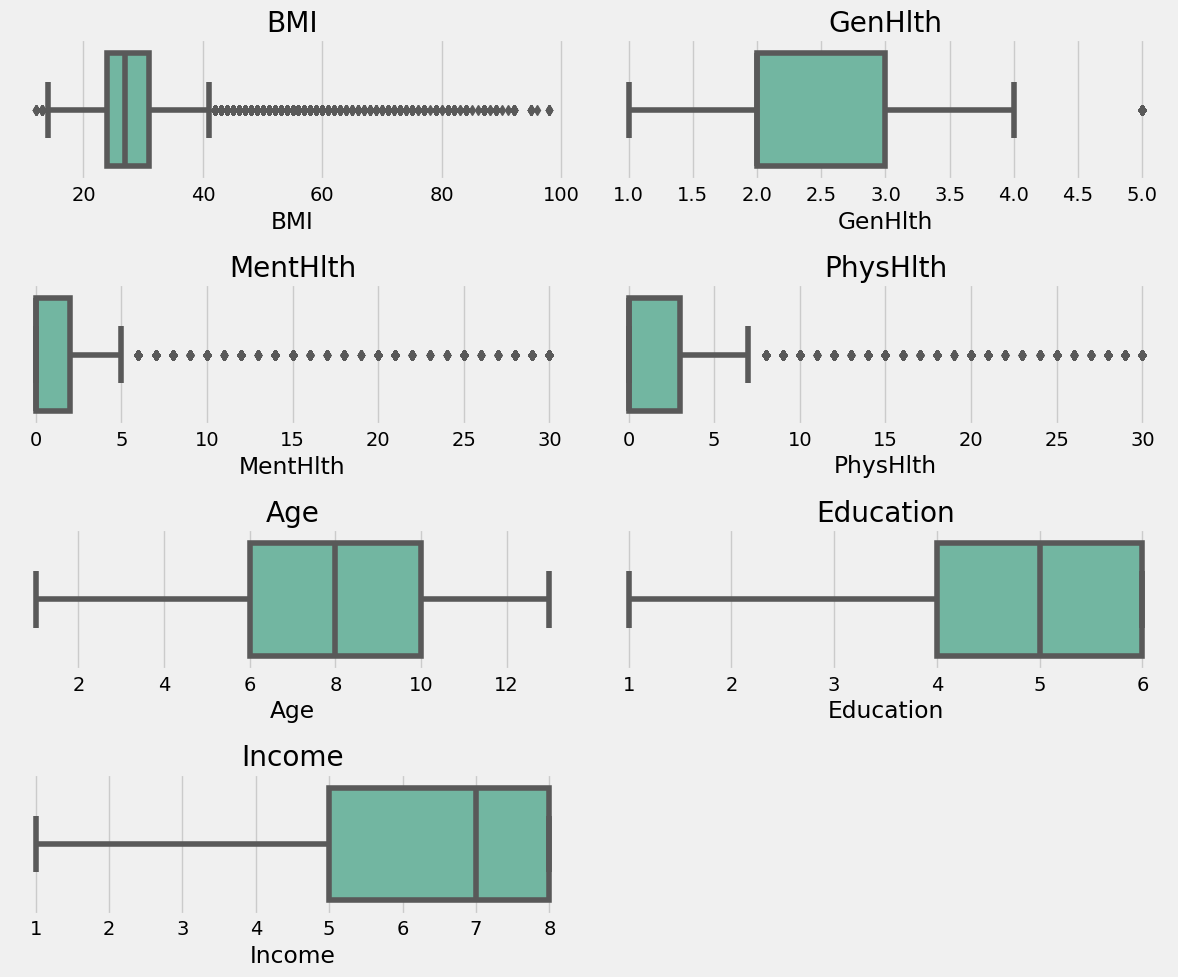

In [14]:
cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

plt.figure(figsize=(12, 10))
for i, col in enumerate(cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], palette='Set2')
    plt.title(col)
plt.tight_layout()
plt.show()

Conclusion: There's outlier in column BMI, GenHlth, MenHlth, PhysHlth, but all columns will transpose to categorical value.

## Check and Drop Duplicated Data

In [71]:
df.duplicated().sum()

24206

In [72]:
df.drop_duplicates(inplace = True)

In [73]:
df.duplicated().sum()

0

In [74]:
df.shape

(229474, 22)

## Transform the Data into Integer

In [8]:
columns_to_convert = ["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                      "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth",
                      "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"]

df[columns_to_convert] = df[columns_to_convert].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  AnyHealthcare         229474 non-null  int64
 13  NoDocbcCost           229474 non-null  int64
 14  GenHlth               229474 non-null  int64
 15  MentHlth              229474 non-null  

# Exploratory Data Analysis

## Univariat Analysis

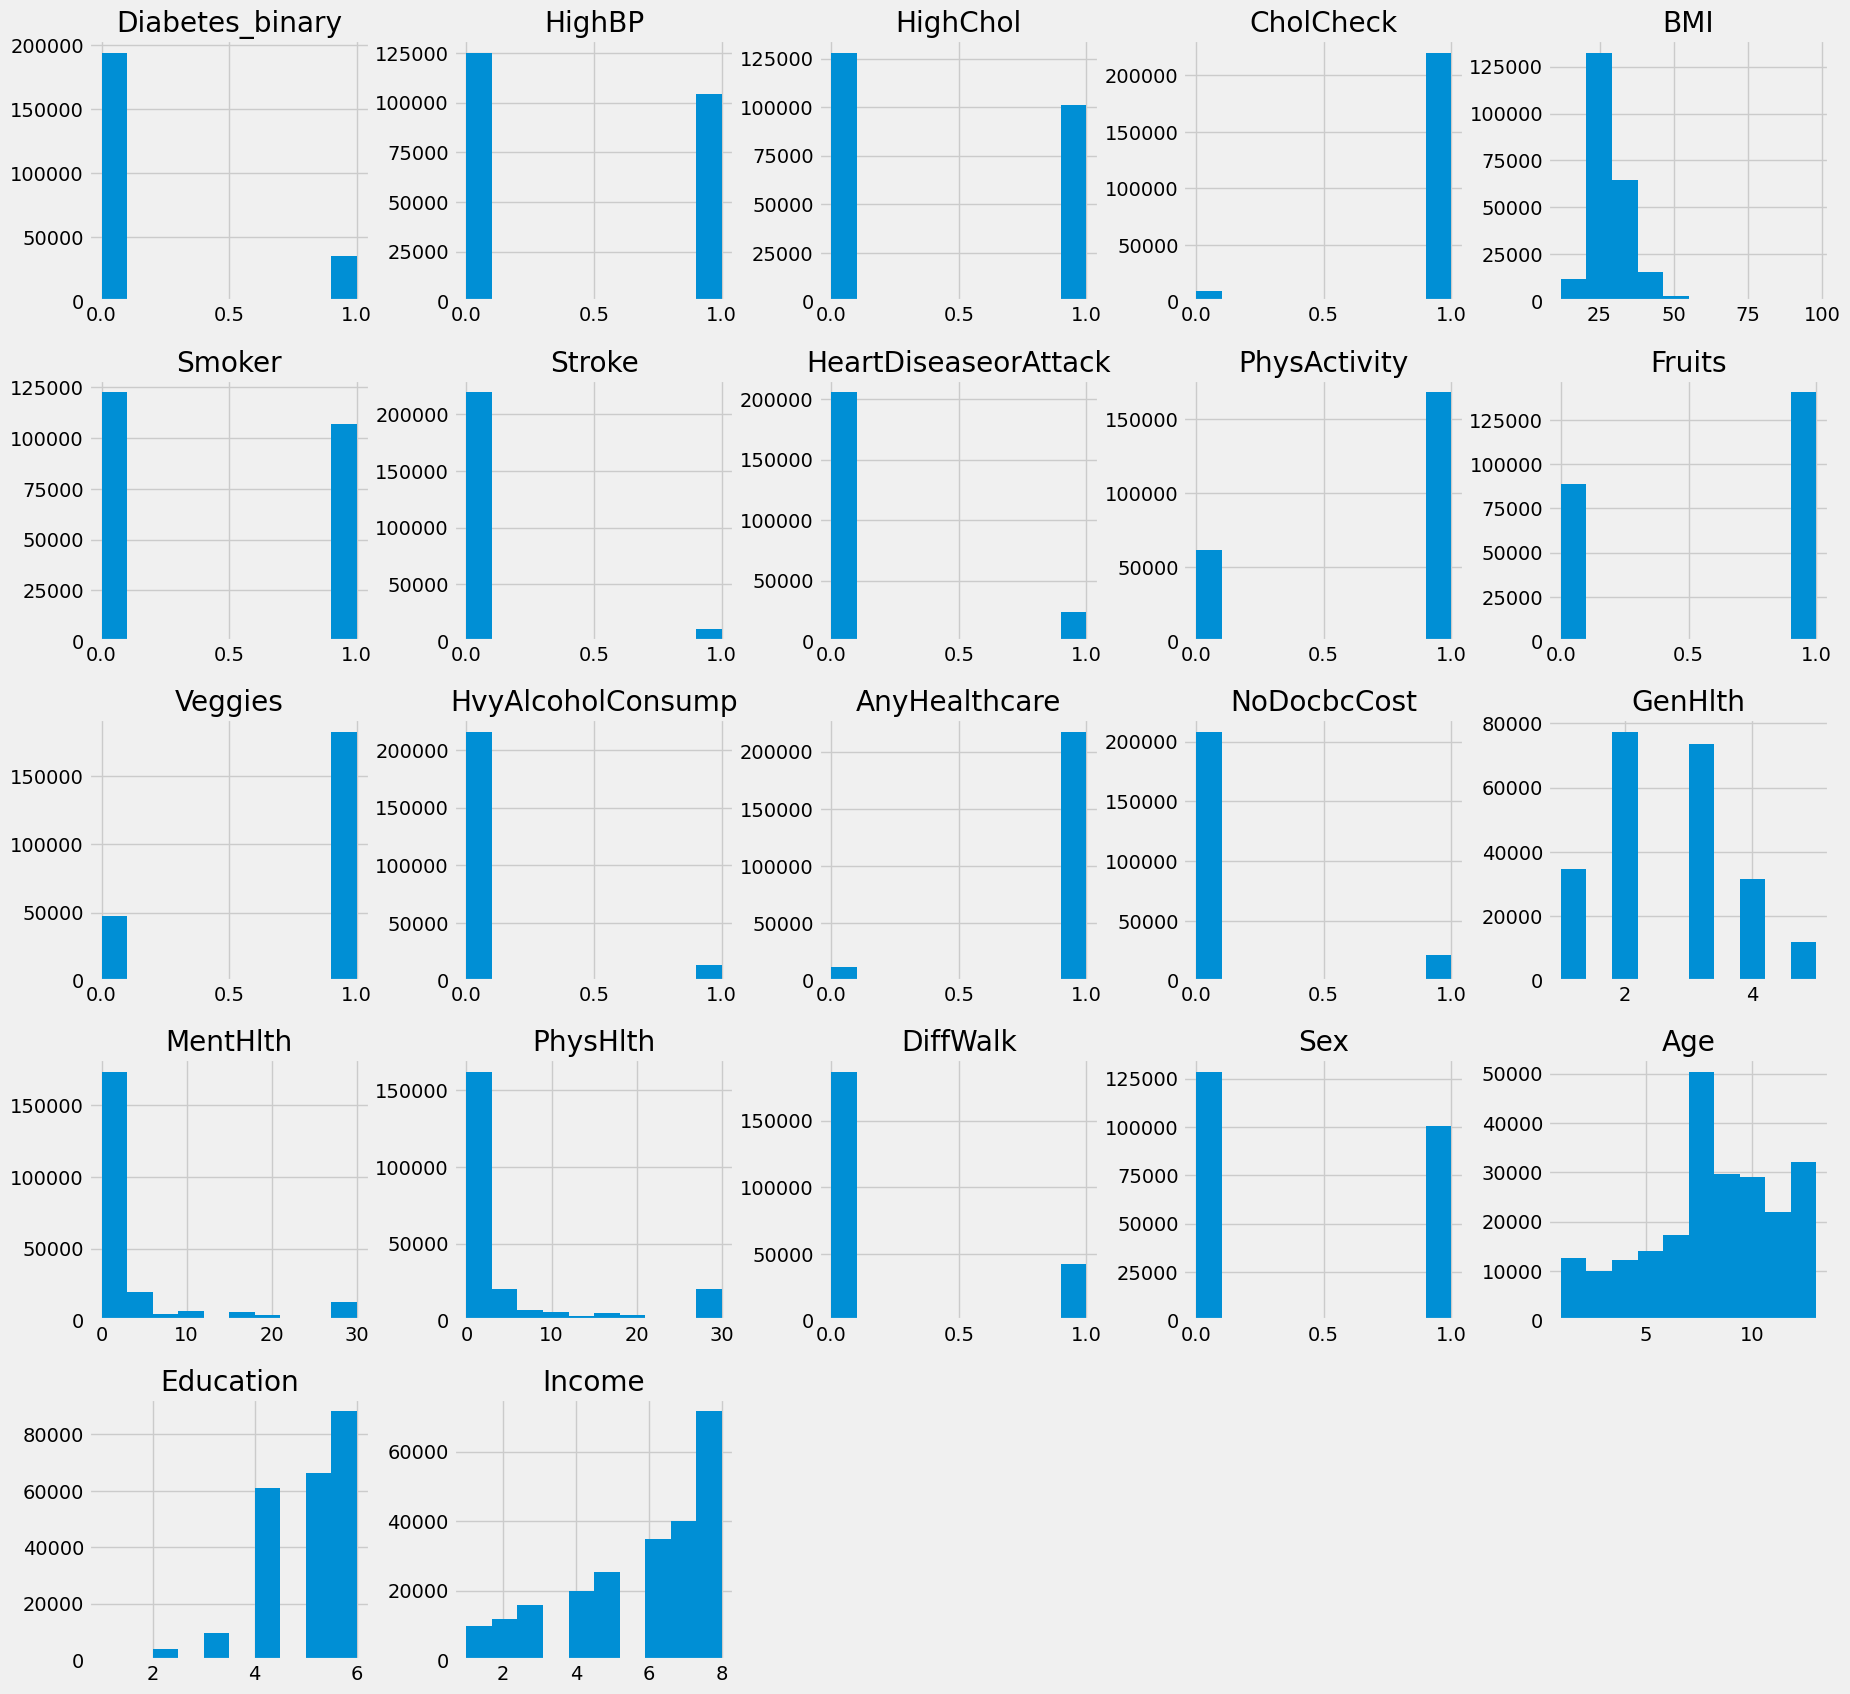

In [23]:
df.hist(figsize = (20,20))
plt.savefig("histogram_01.jpeg")
plt.show()

**To Show the Categorical Variable**

In [83]:
df_1 = df.copy()
df_2 = df.copy()

In [ ]:
# Mapping for column 'Age'
age_mapping = {
    1: '18 to 24',
    2: '25 to 29',
    3: '30 to 34',
    4: '35 to 39',
    5: '40 to 44',
    6: '45 to 49',
    7: '50 to 54',
    8: '55 to 59',
    9: '60 to 64',
    10: '65 to 69',
    11: '70 to 74',
    12: '75 to 79',
    13: '80 or older'
}

# Mapping for column 'Diabetes_binary'
diabetes_mapping = {
    0: 'Non Diabetes',
    1: 'Diabetes'
}

# Mapping for column 'HighBP'
high_bp_mapping = {
    0: 'No High',
    1: 'High BP'
}

# Mapping for column 'HighChol'
high_chol_mapping = {
    0: 'No High Cholesterol',
    1: 'High Cholesterol'
}

# Mapping for column 'CholCheck'
chol_check_mapping = {
    0: 'No Cholesterol Check in 5 Years',
    1: 'Cholesterol Check in 5 Years'
}

# Mapping for column 'Smoker'
smoker_mapping = {
    0: 'Non Smoker',
    1: 'Smoker'
}

# Mapping for column 'Stroke'
stroke_mapping = {
    0: 'Not Stroke',
    1: 'Stroke'
}

# Mapping for column 'HeartDiseaseorAttack'
HeartDiseaseorAttack_mapping = {
    0: 'No Heart Diseaseor Attack',
    1: '# Mapping for column 'Age'
age_mapping = {
    1: '18 to 24',
    2: '25 to 29',
    3: '30 to 34',
    4: '35 to 39',
    5: '40 to 44',
    6: '45 to 49',
    7: '50 to 54',
    8: '55 to 59',
    9: '60 to 64',
    10: '65 to 69',
    11: '70 to 74',
    12: '75 to 79',
    13: '80 or older'
}

# Mapping for column 'Diabetes_binary'
diabetes_mapping = {
    0: 'Non Diabetes',
    1: 'Diabetes'
}

# Mapping for column 'HighBP'
high_bp_mapping = {
    0: 'No High Blood Pressure',
    1: 'High Blood Pressure'
}

# Mapping for column 'HighChol'
high_chol_mapping = {
    0: 'No High Cholesterol',
    1: 'High Cholesterol'
}

# Mapping for column 'CholCheck'
CholCheck_mapping = {
    0: 'No Cholesterol Check in 5 Years',
    1: 'Cholesterol Check in 5 Years'
}

# Mapping for column 'Smoker'
Smoker_mapping = {
    0: 'Non Smoker',
    1: 'Smoker'
}

# Mapping for column 'Stroke'
Stroke_mapping = {
    0: 'Not Stroke',
    1: 'Stroke'
}

# Mapping for column 'HeartDiseaseorAttack'
HeartDiseaseorAttack_mapping = {
    0: 'No Heart Disease or Attack',
    1: 'Heart Disease or Attack'
}

# Mapping for column 'Physical Activity'
PhysActivity_mapping = {
    0: 'Have not physical activity or exercise',
    1: 'Do physical activity or exercise'
}

# Mapping for column 'Fruits'
Fruits_mapping = {
    0: 'Not Consume Fruit',
    1: 'Consume Fruit'
}

# Mapping for column 'Veggies'
Veggies_mapping = {
    0: 'Not Consume Vegetables',
    1: 'Consume Vegetables'
}

# Mapping for column 'HvyAlcoholConsump'
HvyAlcoholConsump_mapping = {
    0: 'Not Heavy drinkers',
    1: 'Heavy drinkers'
}

# Mapping for column 'AnyHealthcare'
AnyHealthcare_mapping = {
    0: 'Not have health care coverage',
    1: 'Have health care coverage'
}

# Mapping for column 'NoDocbcCost'
NoDocbcCost_mapping = {
    0: 'Not have cost barrier to see a doctor',
    1: 'Have cost barrier to see a doctor'
}

# Mapping for column 'GenHlth'
GenHlth_mapping = {
    1: 'Poor',
    2: 'Fair',
    3: 'Good',
    4: 'Very Good',
    5: 'Excellent'
}

# Mapping for column 'DiffWalk'
DiffWalk_mapping = {
    0: 'Not have difficulty walking',
    1: 'Have difficulty walking'
}

# Mapping for column 'Sex'
Sex_mapping = {
    0: 'Female',
    1: 'Male'
}

# Mapping for column 'Education'
Education_mapping = {
    1: 'Never Attended School',
    2: 'Elementary',
    3: 'Junior High School',
    4: 'Senior High School',
    5: 'Some college or technical school',
    6: 'College graduate'
}

# Mapping for column 'Income'
Income_mapping = {
    1: 'Less than $10,000',
    2: '$10,000 to $14,999',
    3: '$15,000 to $19,999',
    4: '$20,000 to $24,999',
    5: '$25,000 to $34,999',
    6: '$35,000 to $49,999',
    7: '$50,000 to $74,999',
    8: '$75,000 or More',
}


# Replace value with methode 'replace'
df_2['Age'] = df_2['Age'].replace(age_mapping)
df_2['Diabetes_binary'] = df_2['Diabetes_binary'].replace(diabetes_mapping)
df_2['HighBP'] = df_2['HighBP'].replace(high_bp_mapping)
df_2['HighChol'] = df_2['HighChol'].replace(high_chol_mapping)
df_2['CholCheck'] = df_2['CholCheck'].replace(CholCheck_mapping)
df_2['Smoker'] = df_2['Smoker'].replace(Smoker_mapping)
df_2['Stroke'] = df_2['Stroke'].replace(Stroke_mapping)
df_2['HeartDiseaseorAttack'] = df_2['HeartDiseaseorAttack'].replace(HeartDiseaseorAttack_mapping)
df_2['PhysActivity'] = df_2['PhysActivity'].replace(PhysActivity_mapping)
df_2['Veggies'] = df_2['Veggies'].replace(Veggies_mapping)
df_2['HvyAlcoholConsump'] = df_2['HvyAlcoholConsump'].replace(HvyAlcoholConsump_mapping)
df_2['AnyHealthcare'] = df_2['AnyHealthcare'].replace(AnyHealthcare_mapping)
df_2['NoDocbcCost'] = df_2['NoDocbcCost'].replace(NoDocbcCost_mapping)
df_2['GenHlth'] = df_2['GenHlth'].replace(GenHlth_mapping)
df_2['DiffWalk'] = df_2['DiffWalk'].replace(DiffWalk_mapping)
df_2['Sex'] = df_2['Sex'].replace(Sex_mapping)
df_2['Education'] = df_2['Education'].replace(Education_mapping)
df_2['Income'] = df_2['Income'].replace(Income_mapping)

In [20]:
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

### Binary Variabels Proportion

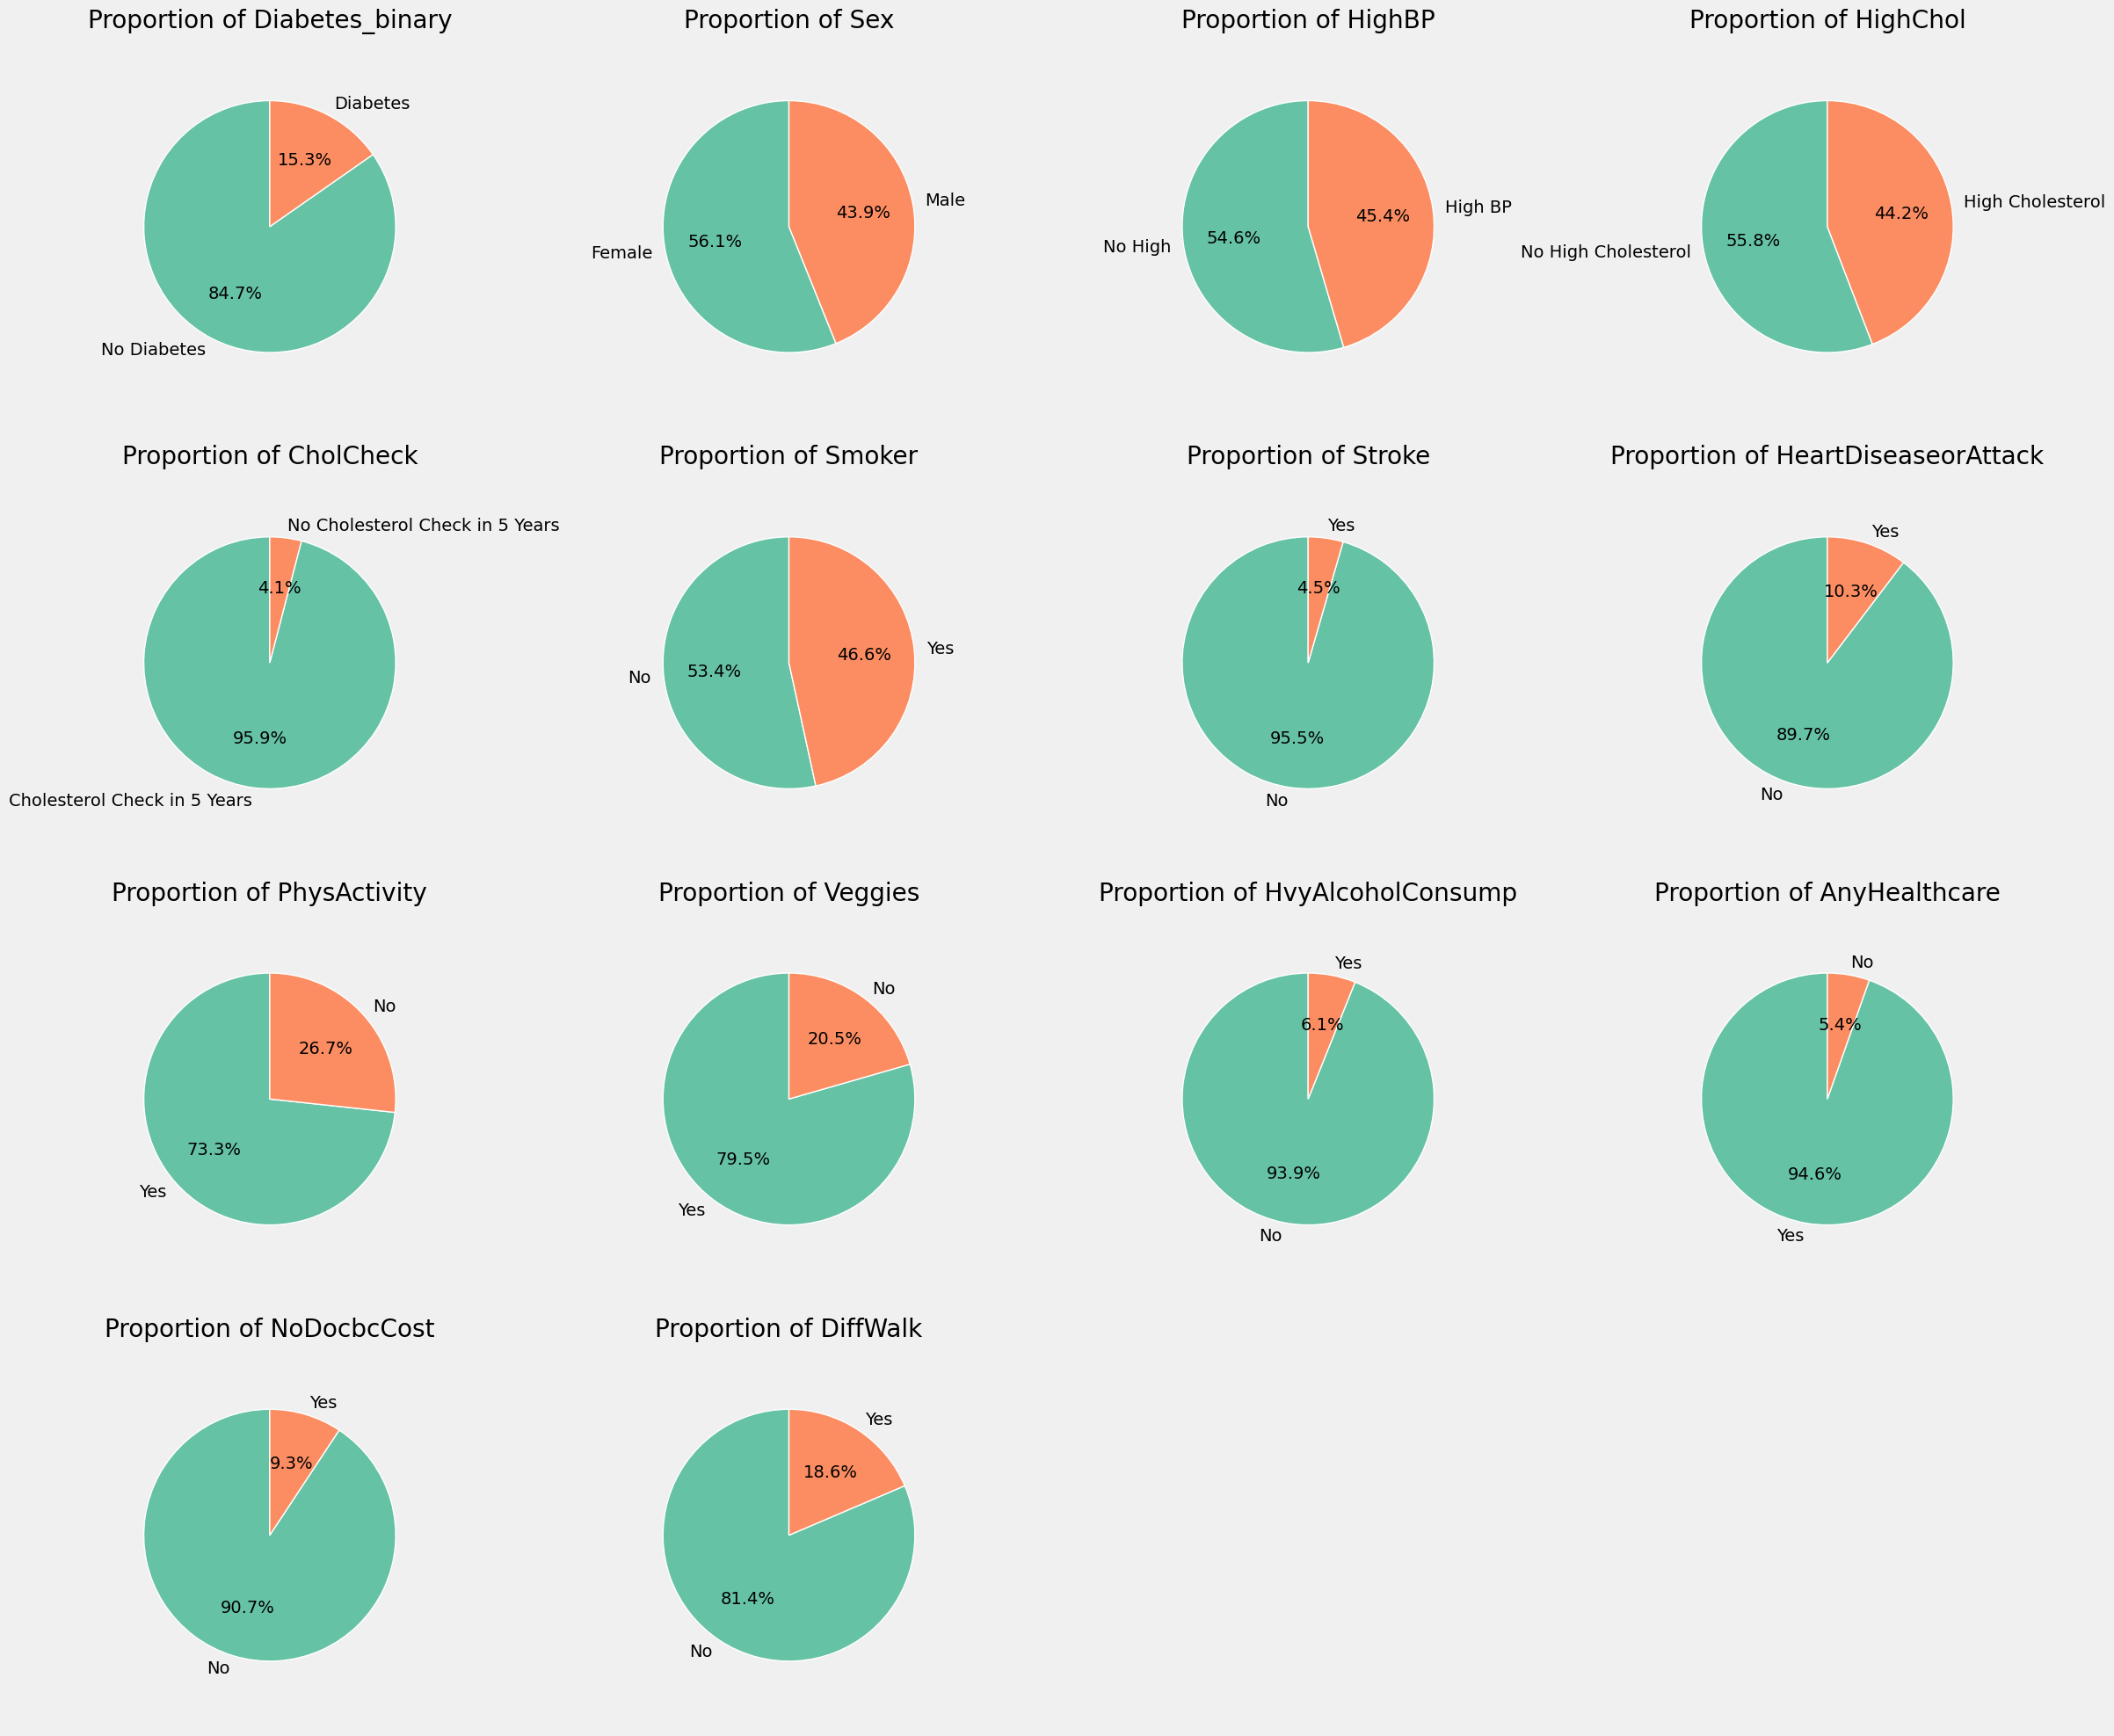

In [22]:
# List binary variables
binary_vars = ['Diabetes_binary', 'Sex', 'HighBP', 'HighChol', 'CholCheck',
              'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
              'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Create color palette
colors = sns.color_palette('Set2', n_colors=len(binary_vars))

# Set figure size
plt.figure(figsize=(24, 20))

# Looping to create pie chart for every binary variables
for i, var in enumerate(binary_vars, 1):
    plt.subplot(4, 4, i)
    biner_counts = df_2[var].value_counts()
    labels = biner_counts.index
    sizes = biner_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1})  # Menggunakan warna dari palet dan menambahkan properti wedgeprops
    plt.title(f'Proportion of {var}')
    plt.axis('equal')

plt.savefig('binary_pie_02.jpeg')
plt.tight_layout()
plt.show()

### Categorical Variables Frecuency Distribution

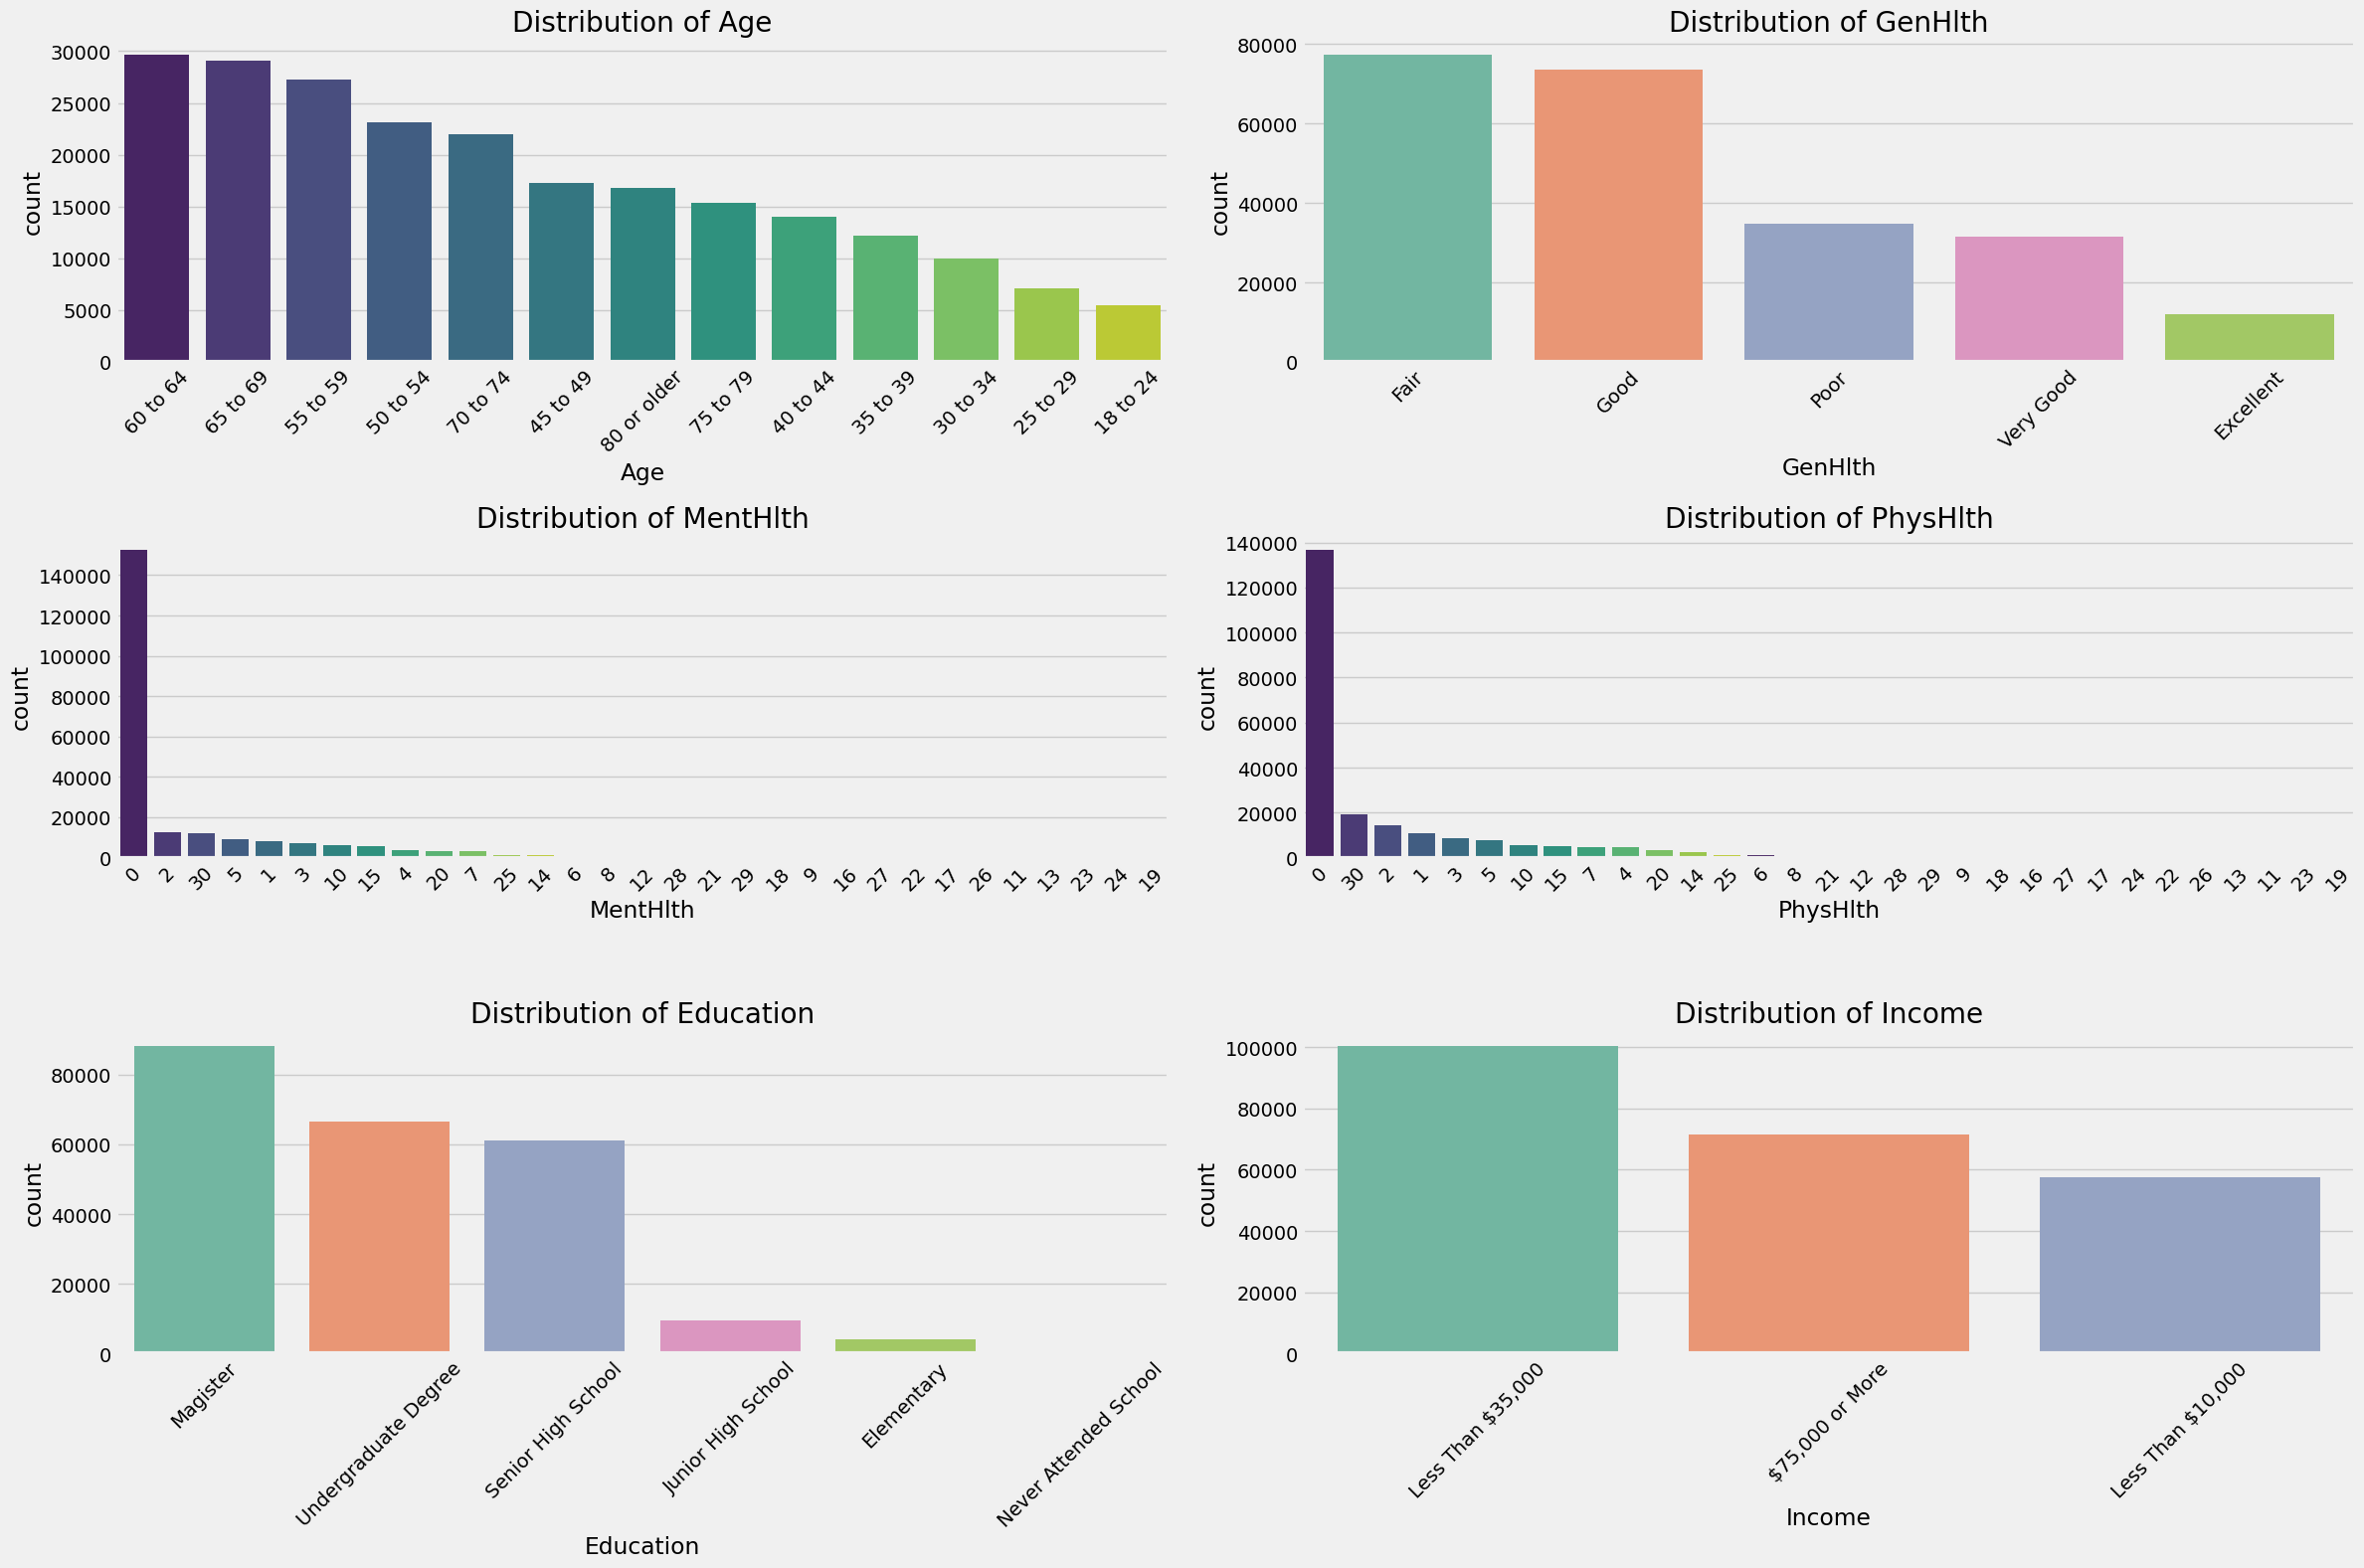

In [25]:
# Gradient color palette for 'Age', 'MentHlth', 'PhysHlth', and 'Income'
gradasi_palette = sns.color_palette("viridis", n_colors=len(df_2['Age'].unique()))

# Colorful palette for 'GenHlth' and 'Education'
warna_berwarna = sns.color_palette("Set2")

# Set the visualization size
plt.figure(figsize=(24, 16))

# Loop to create a count plot for each categorical variable
for i, var in enumerate(['Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income'], 1):
    plt.subplot(3, 2, i)
    if var in ['Age', 'MentHlth', 'PhysHlth']:
        sns.countplot(x=var, data=df_2, palette=gradasi_palette, order=df_2[var].value_counts().index)
    else:
        sns.countplot(x=var, data=df_2, palette=warna_berwarna, order=df_2[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)

plt.savefig('category_bar_01.jpeg')
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

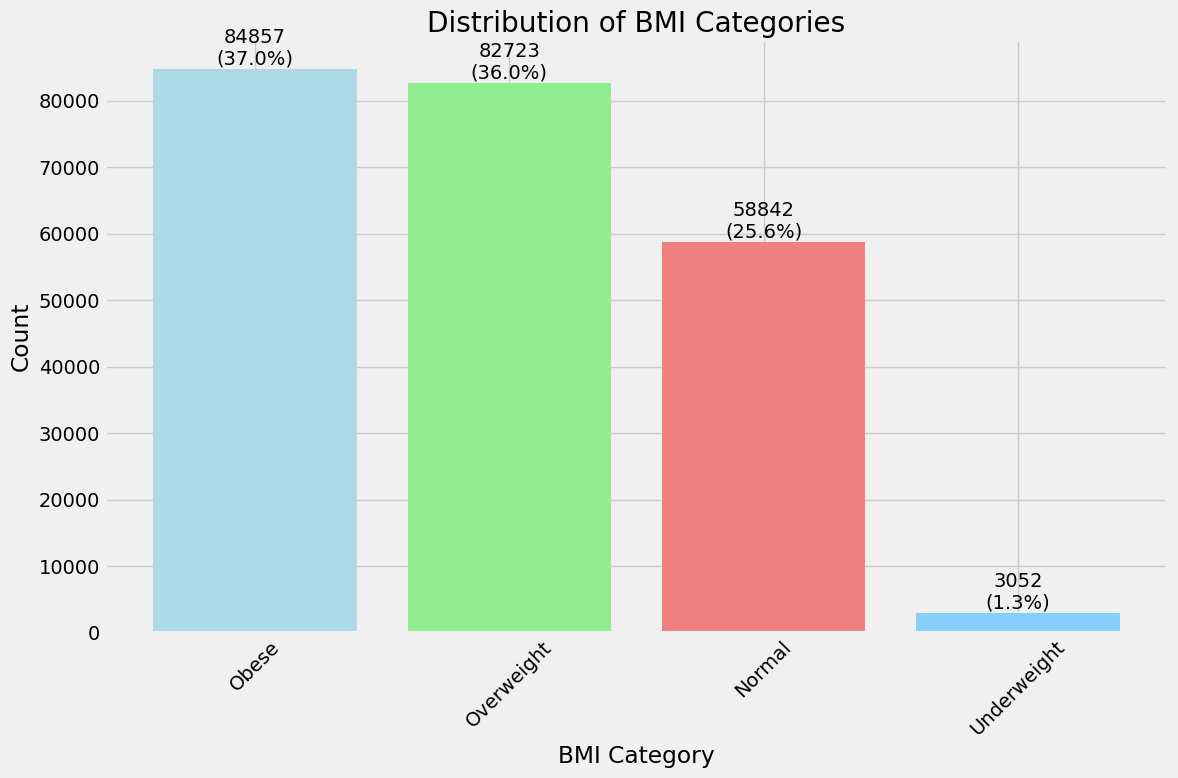

In [26]:
# Categorizing BMI variables
df_2['BMI_Category'] = pd.cut(df_2['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Set the visualization size
#plt.figure(figsize=(8, 8))

# Calculate the amount of data for each BMI category
#bmi_category_counts = df_2['BMI_Category'].value_counts()

# Set the visualization size
plt.figure(figsize=(12, 8))

# Calculate the amount of data for each BMI category
bmi_category_counts = df_2['BMI_Category'].value_counts()

# Setting up colors for the histogram
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Create a histogram for BMI categories
bars = plt.bar(bmi_category_counts.index, bmi_category_counts.values, color=colors)

# Added number labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height}\n({height / len(df_2) * 100:.1f}%)',
             ha='center', va='bottom')

plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')

plt.xticks(rotation=45)
plt.savefig('BMI_01.jpeg')
plt.tight_layout()
plt.show()

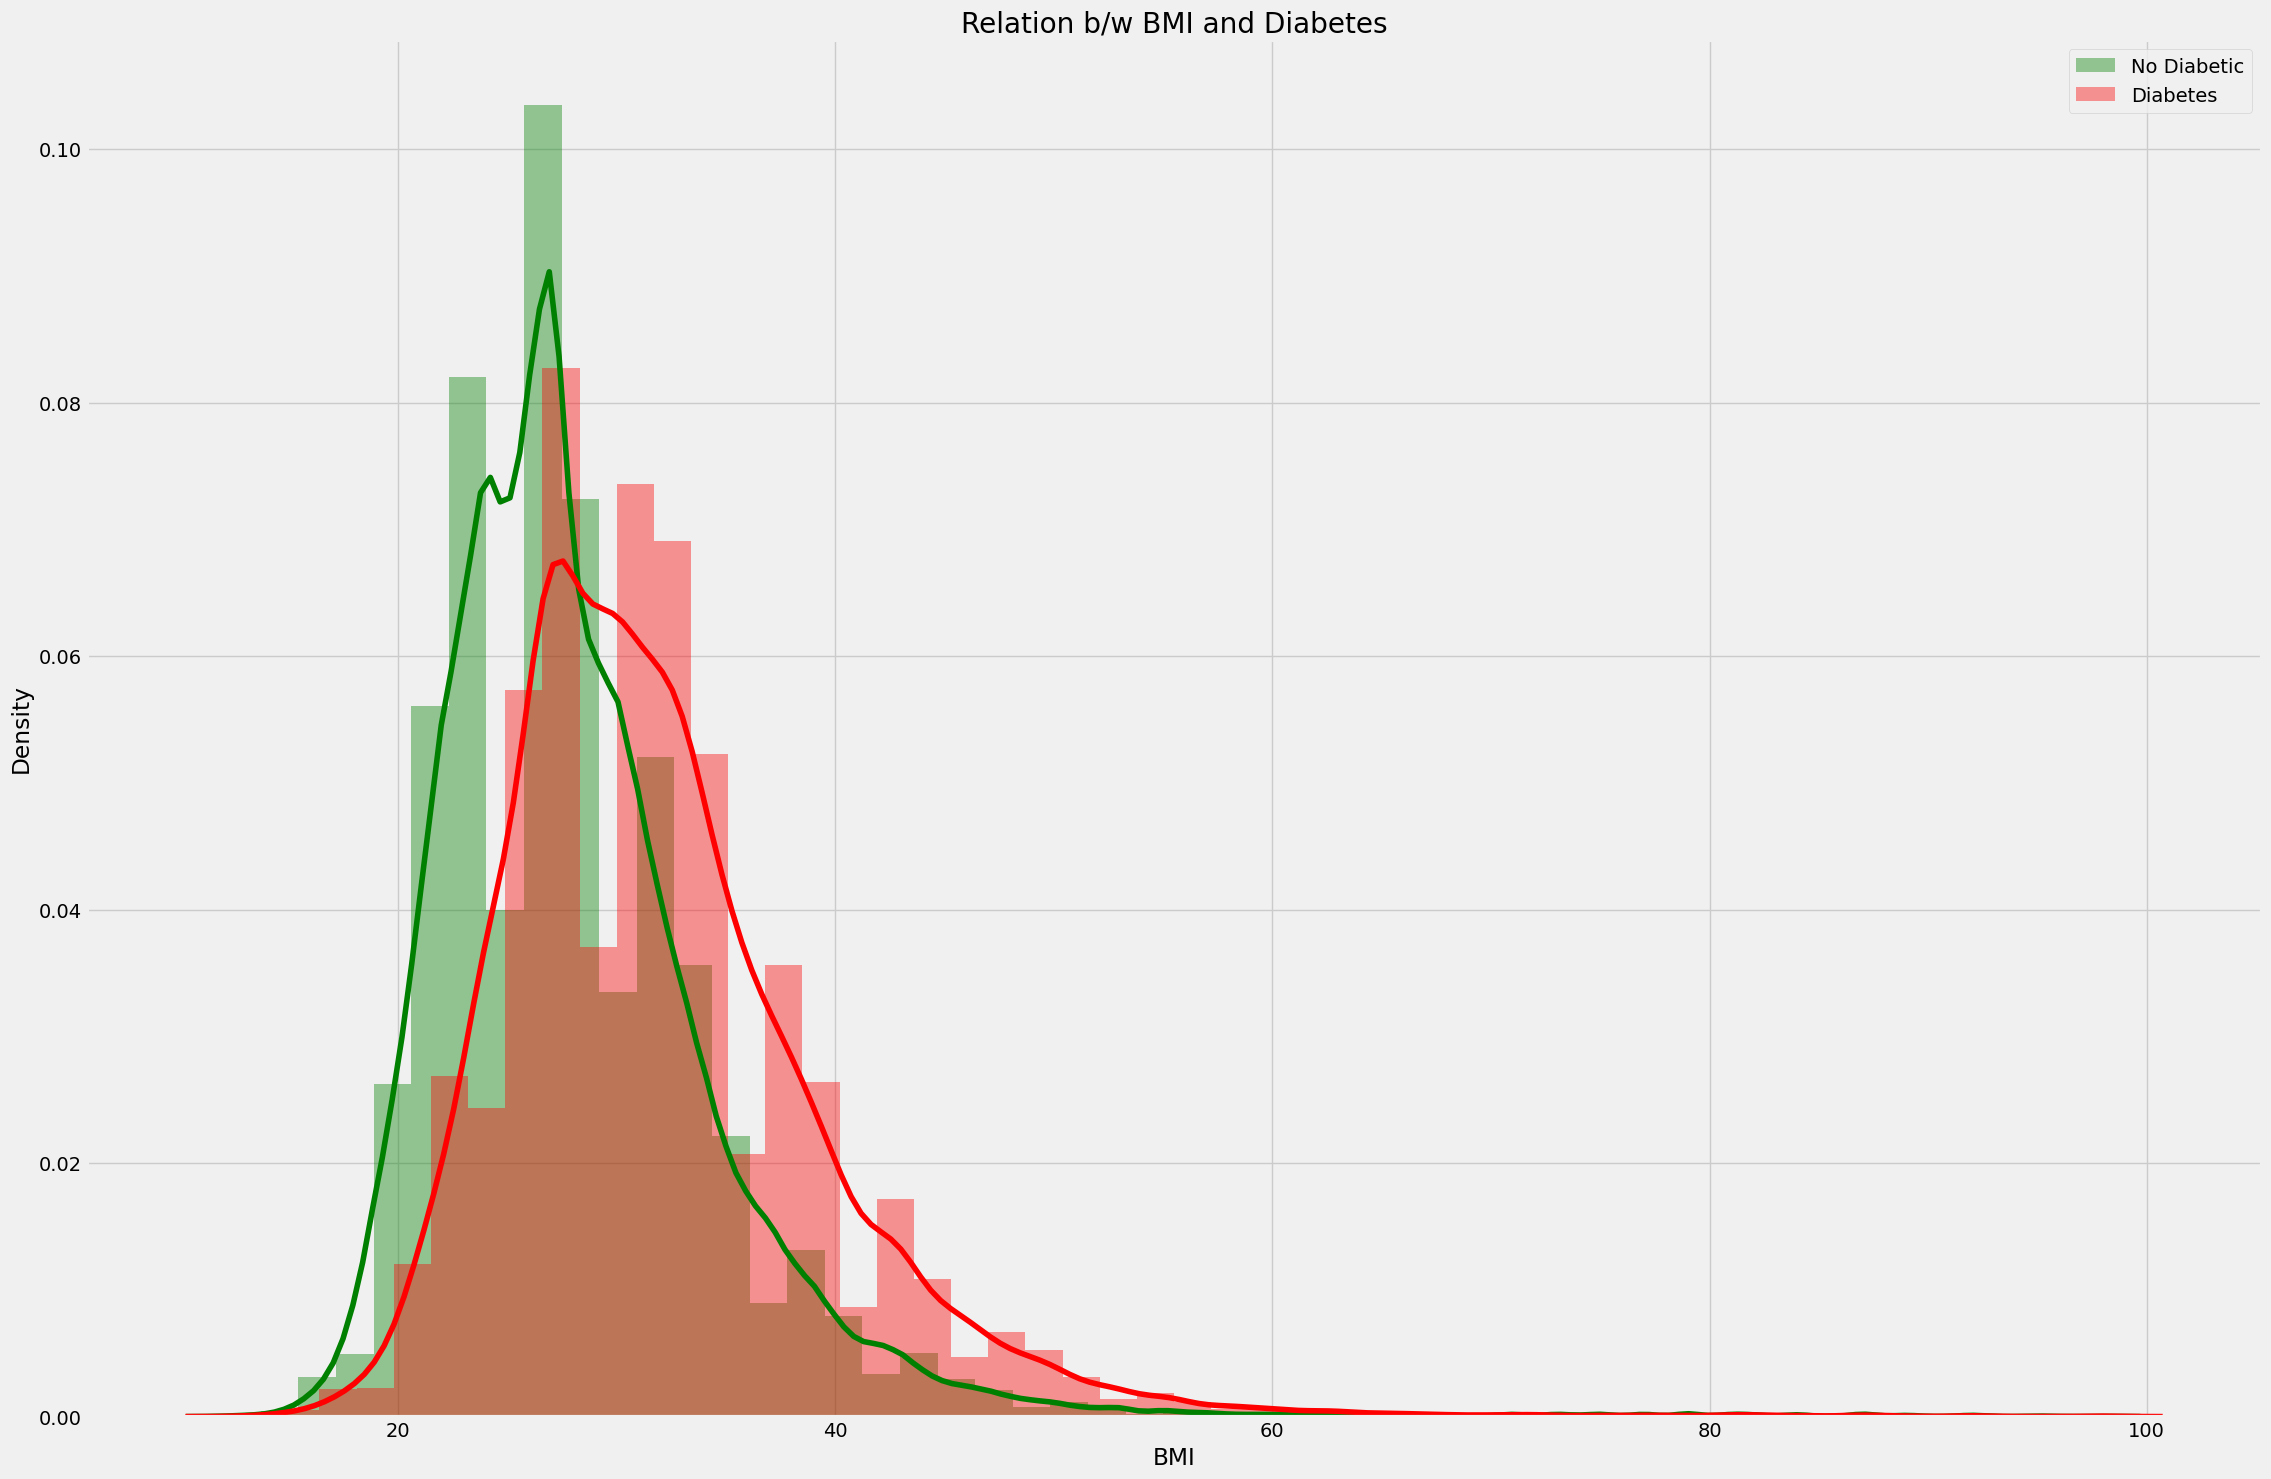

In [90]:
#count plot of BMI 

plt.figure(figsize=(25, 17))
warnings.filterwarnings('ignore')

sns.distplot(df_1.BMI[df_1.Diabetes_binary == 0], color="g", label="No Diabetic" )
sns.distplot(df_1.BMI[df_1.Diabetes_binary == 1], color="r", label="Diabetes" )
plt.title("Relation b/w BMI and Diabetes")

plt.legend()

### Heatmap Correlation

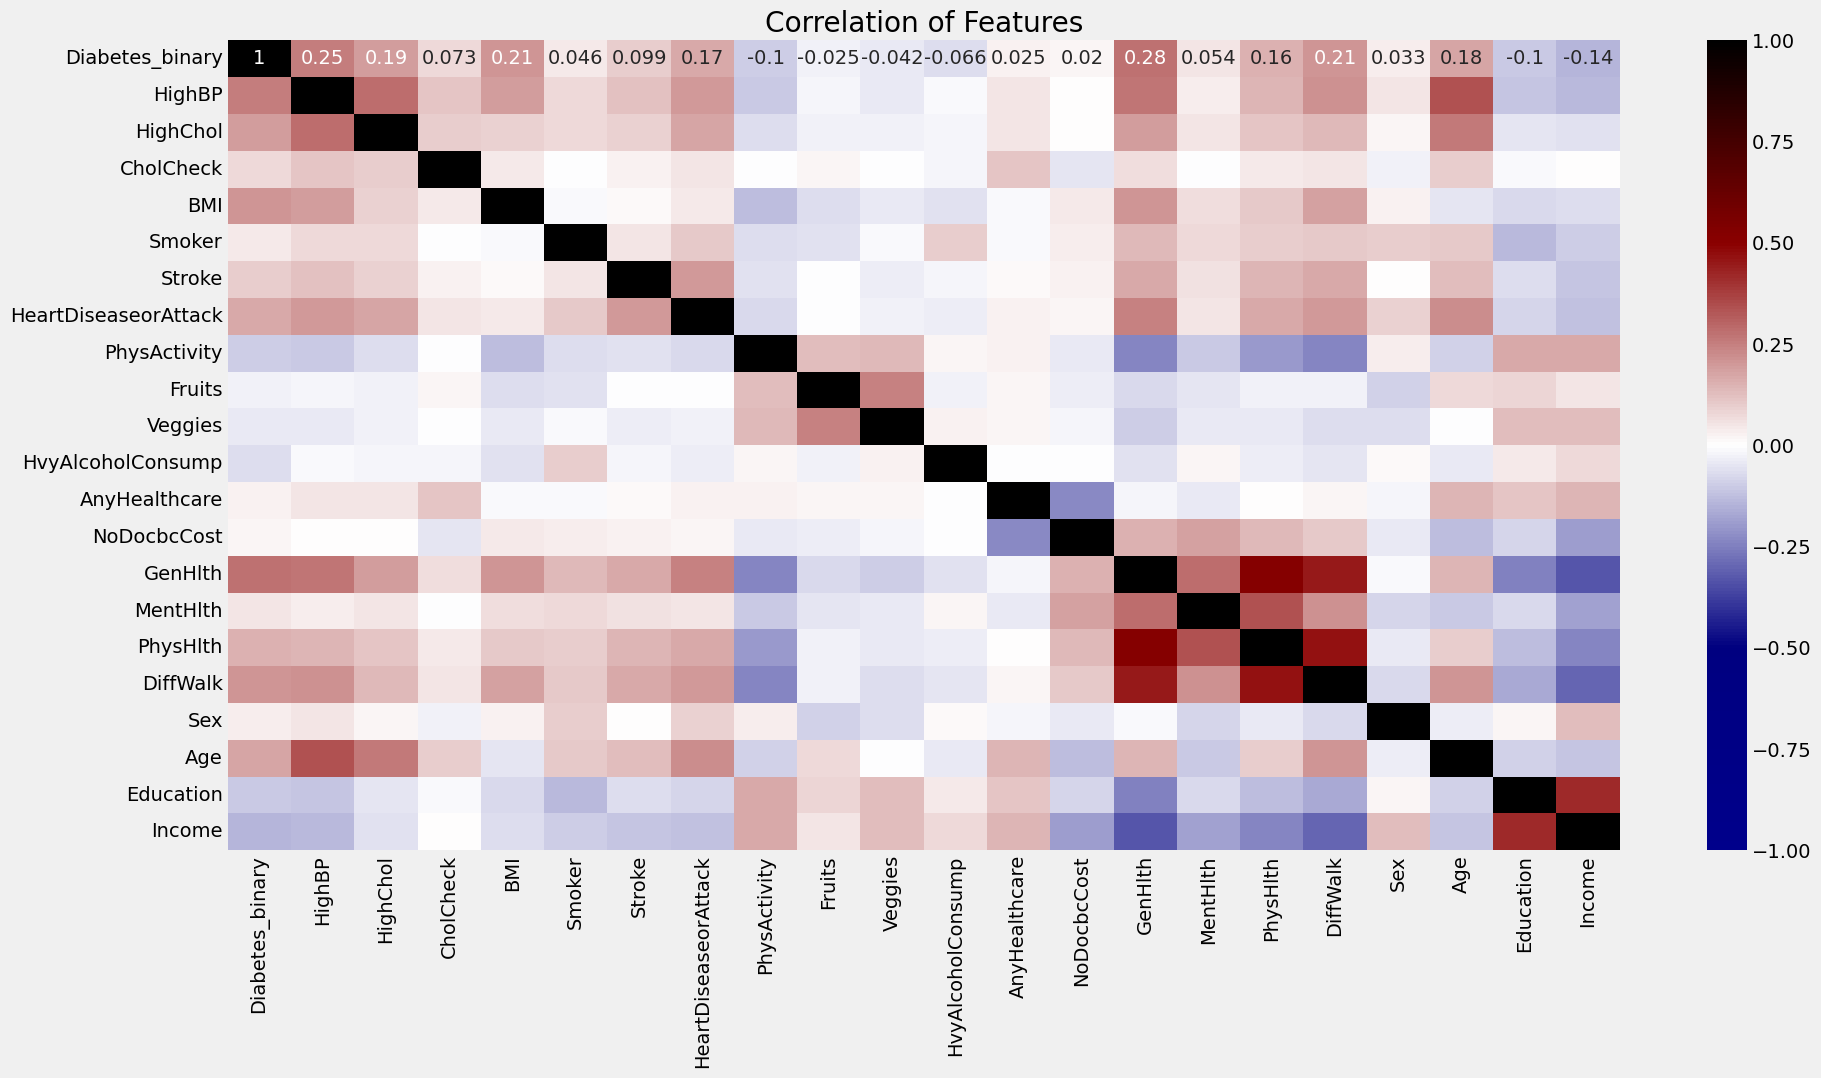

In [77]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 'darkblue'), (0.25, 'navy'), (0.5, 'white'), (0.75, 'darkred') , (1, 'black')]
cmap = LinearSegmentedColormap.from_list('custom', colors)
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title("Correlation of Features")
plt.show()

### Bar correlation

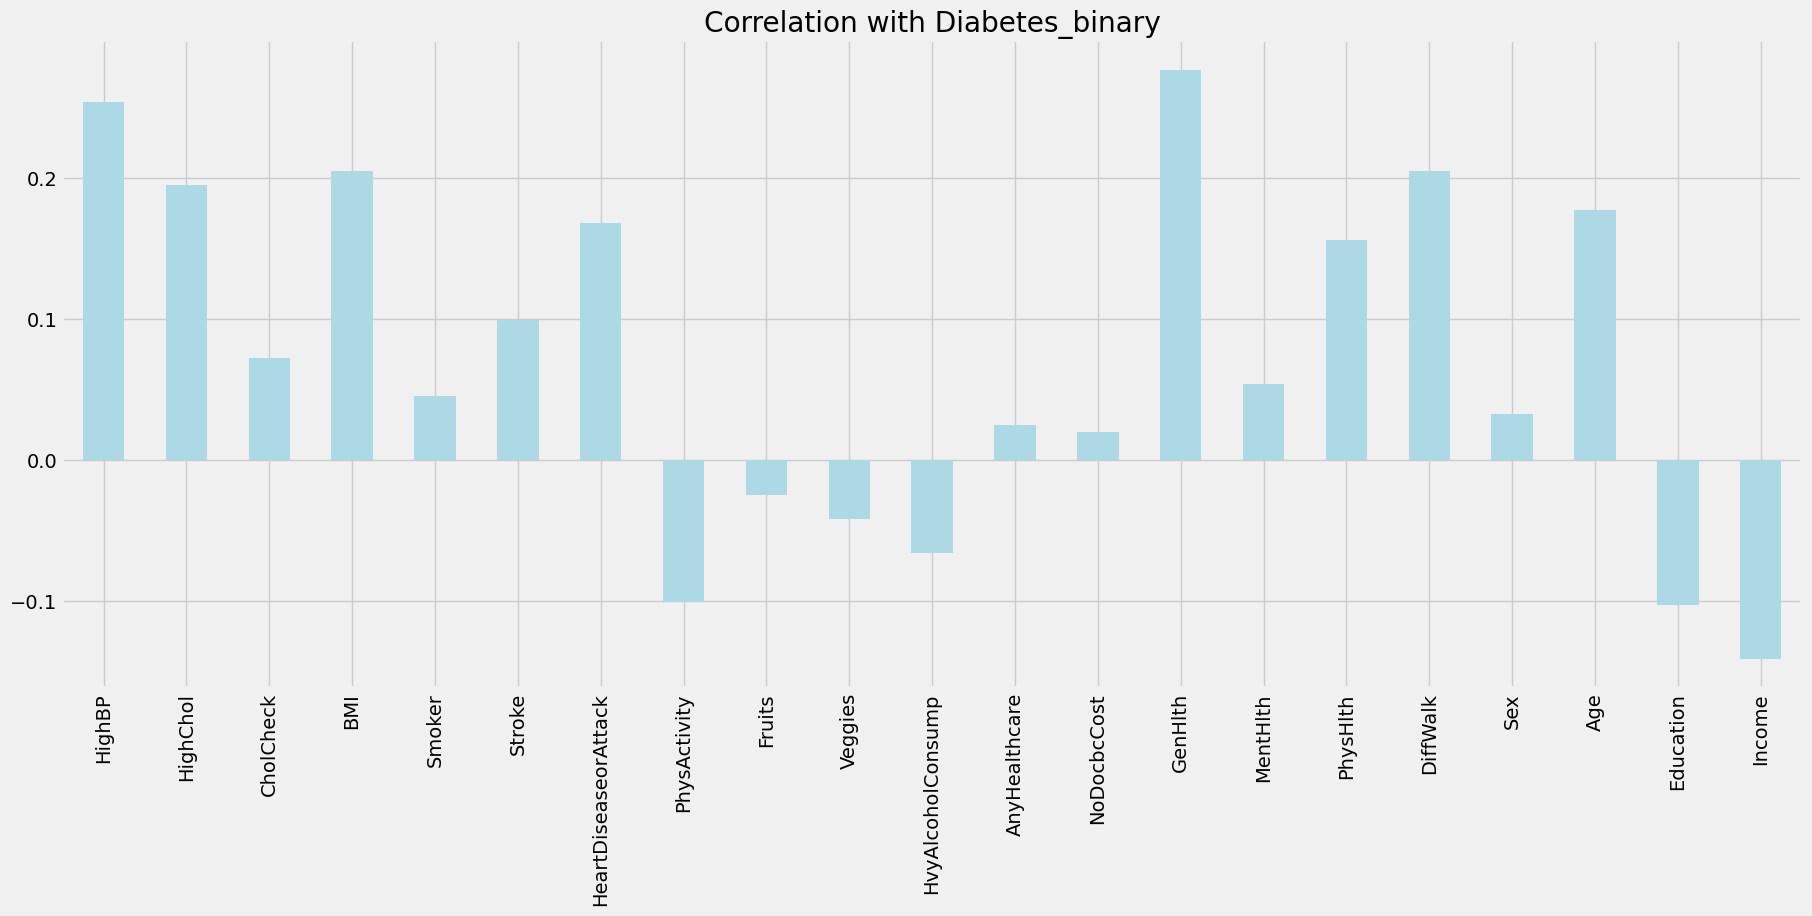

In [76]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="lightblue");

# Feature Selection

Conclusion:
Strong Correlation: (GenHlth, PhysHlth),
Moderate Corellation: (PhysHlth, DiffWalk), (GenHlth, DiffWalk), (PhysHlth, MentHlth), (Education, Income), (HighBP, Age) are moderately correleted with each other as positive relation meanwhile (GenHlth, Income), (DiffWalk, Income) are moderately correlated with each other as negative relation

### Diabetes Correlation Factors

**Pivot Table for Diabetes versus Another Binary Variables**

In [29]:
def create_plot_pivot(df_2, x_column):

    _df_plot = df_2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return _df_plot

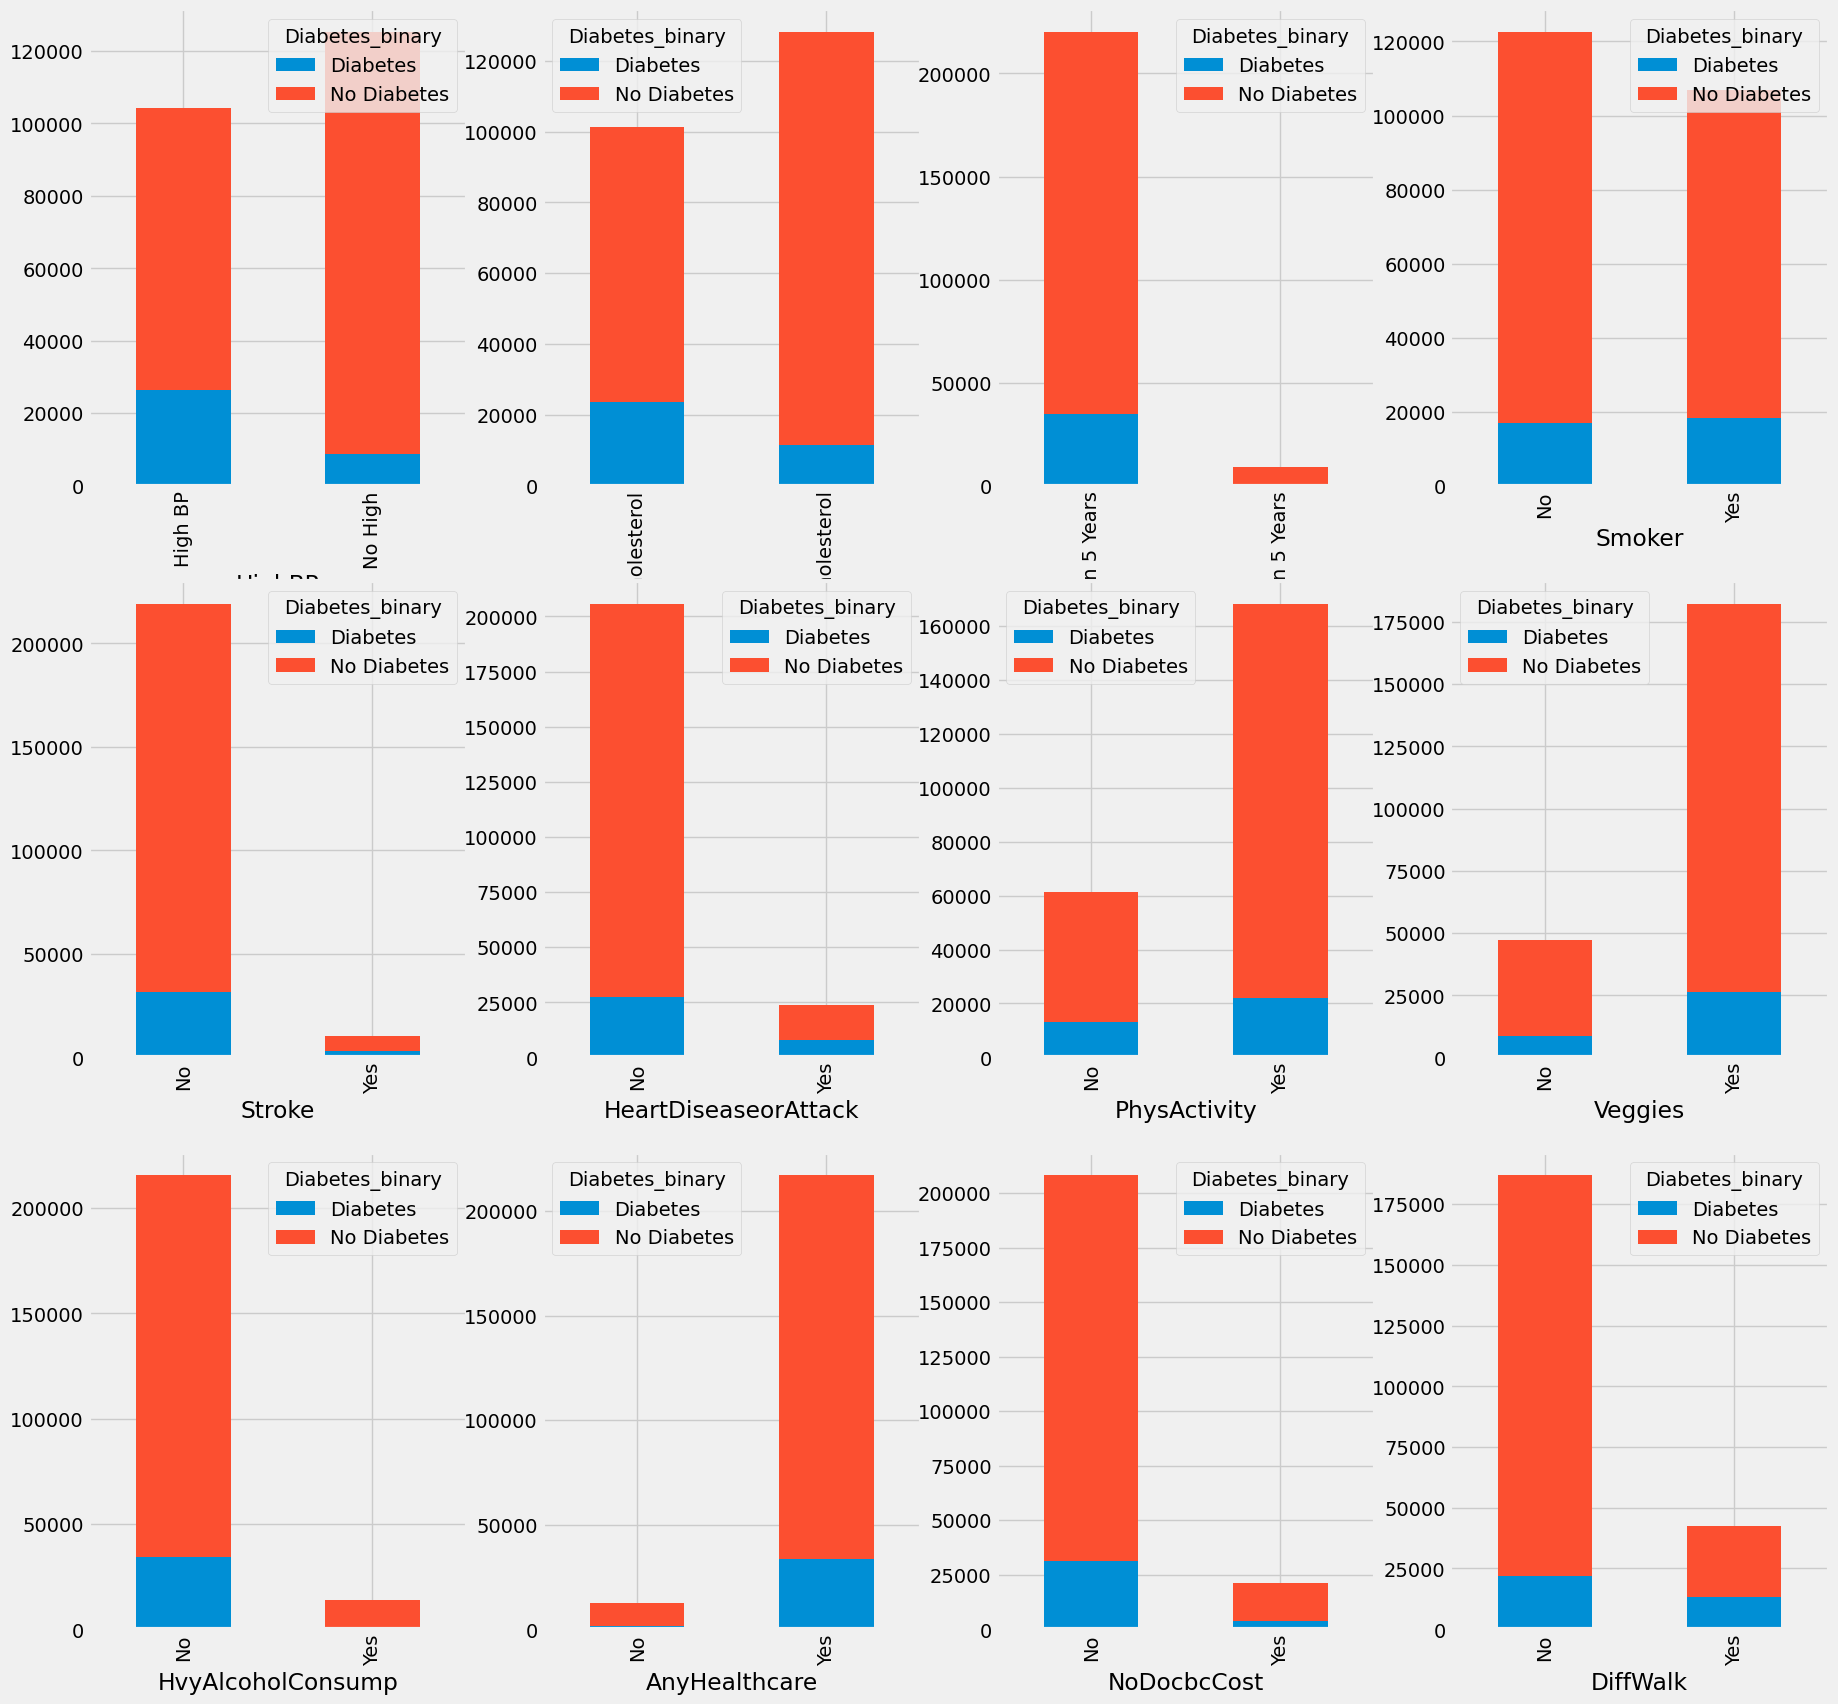

In [31]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(df_2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

plt.savefig('category_bar_02.jpeg')
fig.show()

In [32]:
df_2["Diabetes_binary"].value_counts()

Diabetes_binary
No Diabetes    194377
Diabetes        35097
Name: count, dtype: int64

Conclusion: The number of healthy people is bigger than people with diabetes

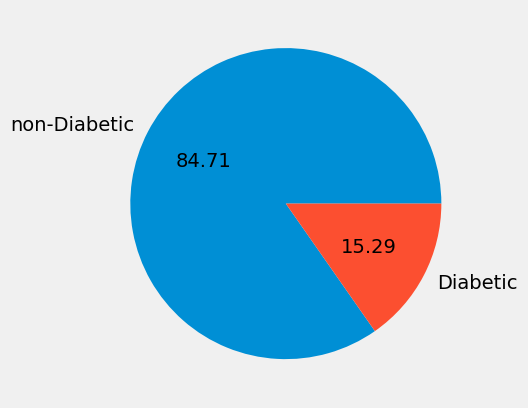

In [33]:
labels=["non-Diabetic","Diabetic"]
plt.pie(df_2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

**Plot Relation with Age**

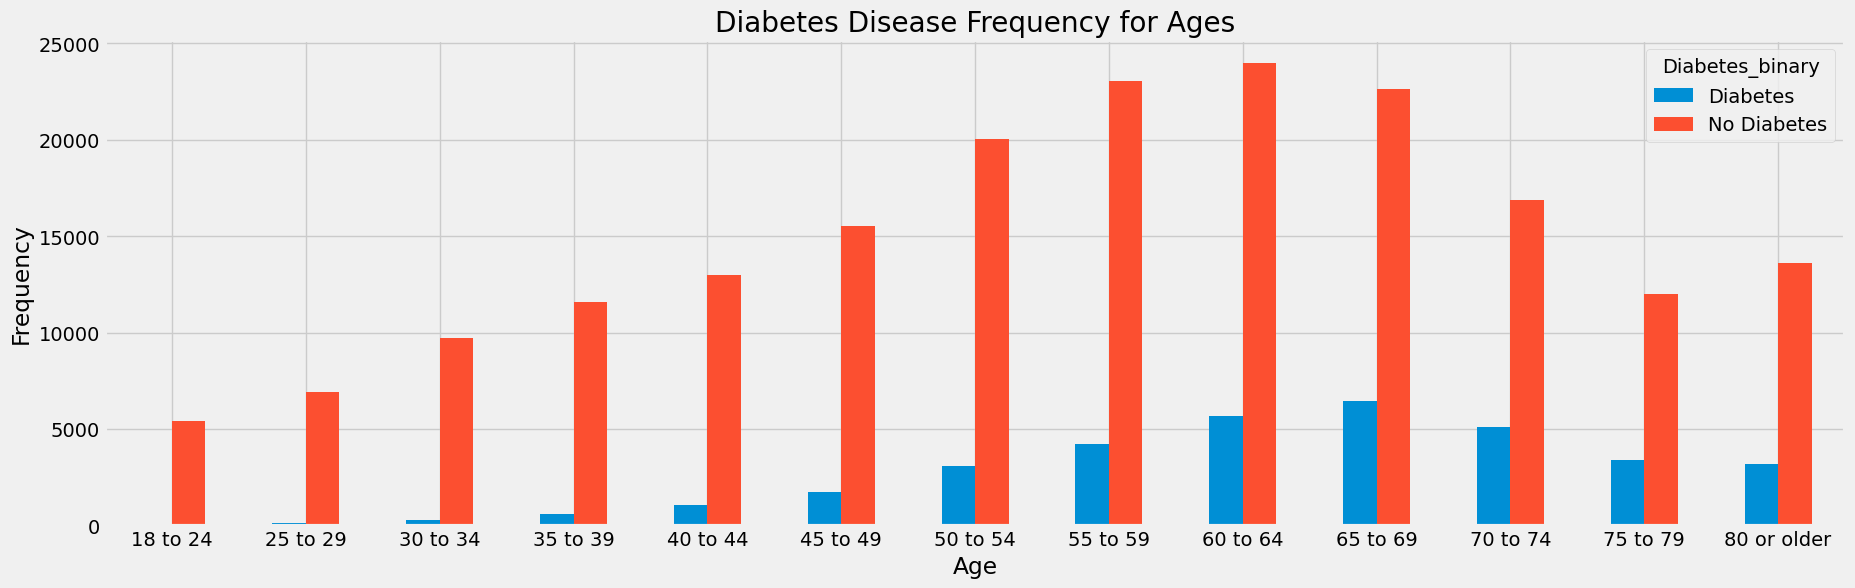

In [34]:
pd.crosstab(df_2.Age,df_2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Plot Relation with Education**

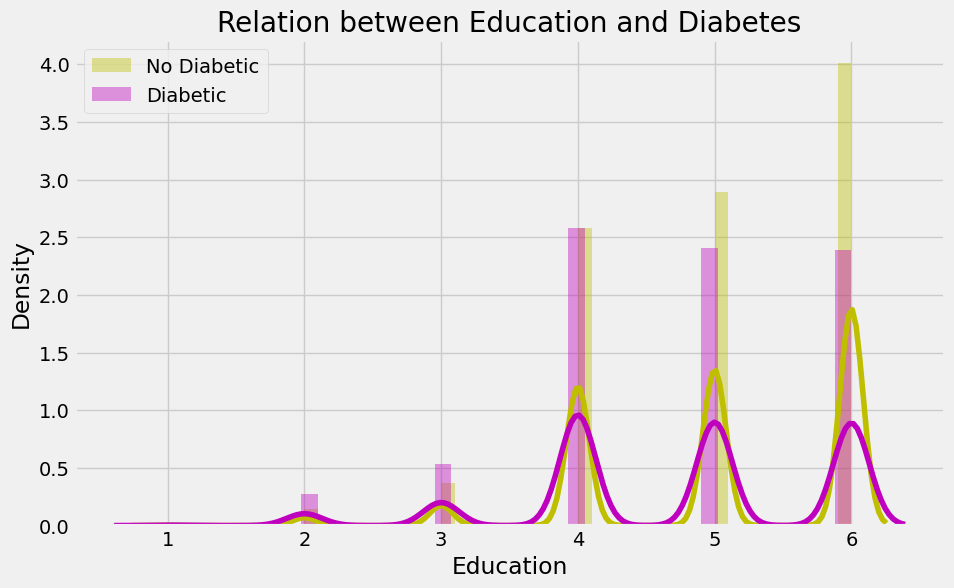

In [35]:
plt.figure(figsize=(10,6))

sns.distplot(df.Education[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.distplot(df.Education[df.Diabetes_binary == 1], color="m", label="Diabetic" )
plt.title("Relation between Education and Diabetes")

plt.legend()

Conclusion: Most people have a high level of education, and those with higher levels of education tend to experience better overall health

**Plot Relation with Age**

In [78]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic
#Adding new column Diabetes_binary_

df["Diabetes_binary_"] = df["Diabetes_binary"].replace({"NonDiabetic" : 0, "Diabetic": 1})

# Convert data type into Integer
df["Diabetes_binary_"] = df["Diabetes_binary_"].astype(int)

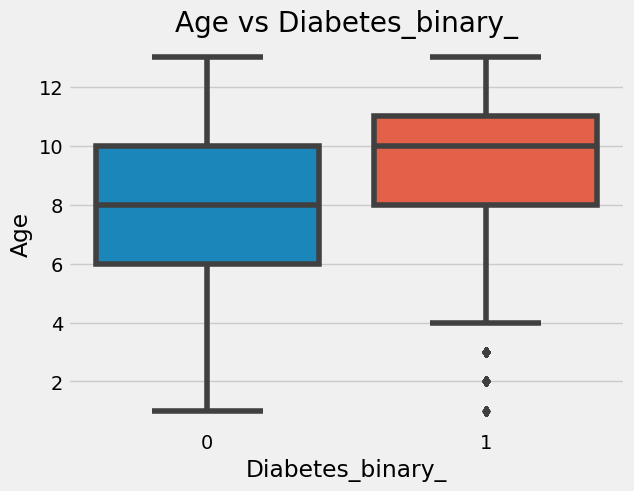

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        0.0           0.0     0.0  ...            1.0   
1                        0.0           1.0     0.0  ...            0.0   
2                        0.0           0.0     1.0  ...            1.0   
3                        0.0           1.0     1.0  ...            1.0   
4                        0.0           1.0     1.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0               0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1               1.0      3.0       0.0       0.0       0.0  0.0   7.0   
2               1.0      5.0      30.0      30.0       1.0  0.0   9.0   
3               0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4               0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...             ...      ...       ...       ...       ...  ...   ...   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
0             4.0     3.0  
1             6.0     1.0  
2             4.0     8.0  
3             3.0     6.0  
4             5.0     4.0  
...           ...     ...  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[229474 rows x 22 columns]

In [79]:
sns.boxplot(x='Diabetes_binary_', y='Age', data=df)
plt.title('Age vs Diabetes_binary_')
plt.show()

df.drop('Diabetes_binary_', axis=1)

Conclusion: As the age increases, the chances of diabetes also commonly increases

**Plot Relation with Income**

<Figure size 2000x1000 with 0 Axes>

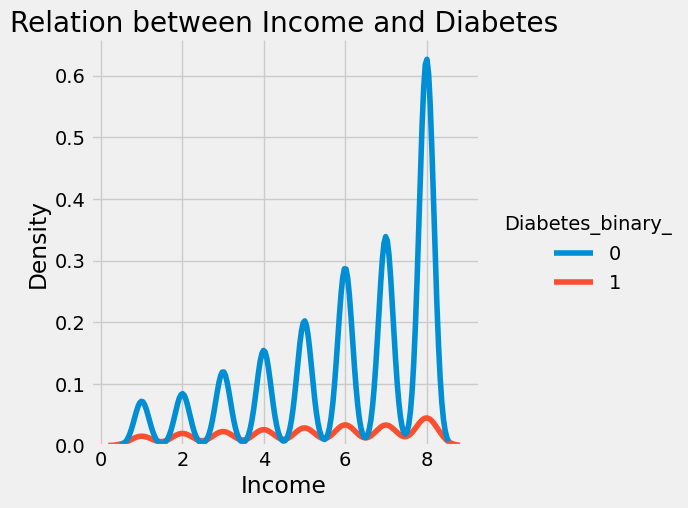

In [38]:
plt.figure(figsize=(20, 10))
sns.displot(data=df, x="Income", hue="Diabetes_binary_", kind="kde")
plt.title("Relation between Income and Diabetes")
plt.show()

Conclusion: The higher the income, the healthier people become

**Plot Relation with  Mental Health**

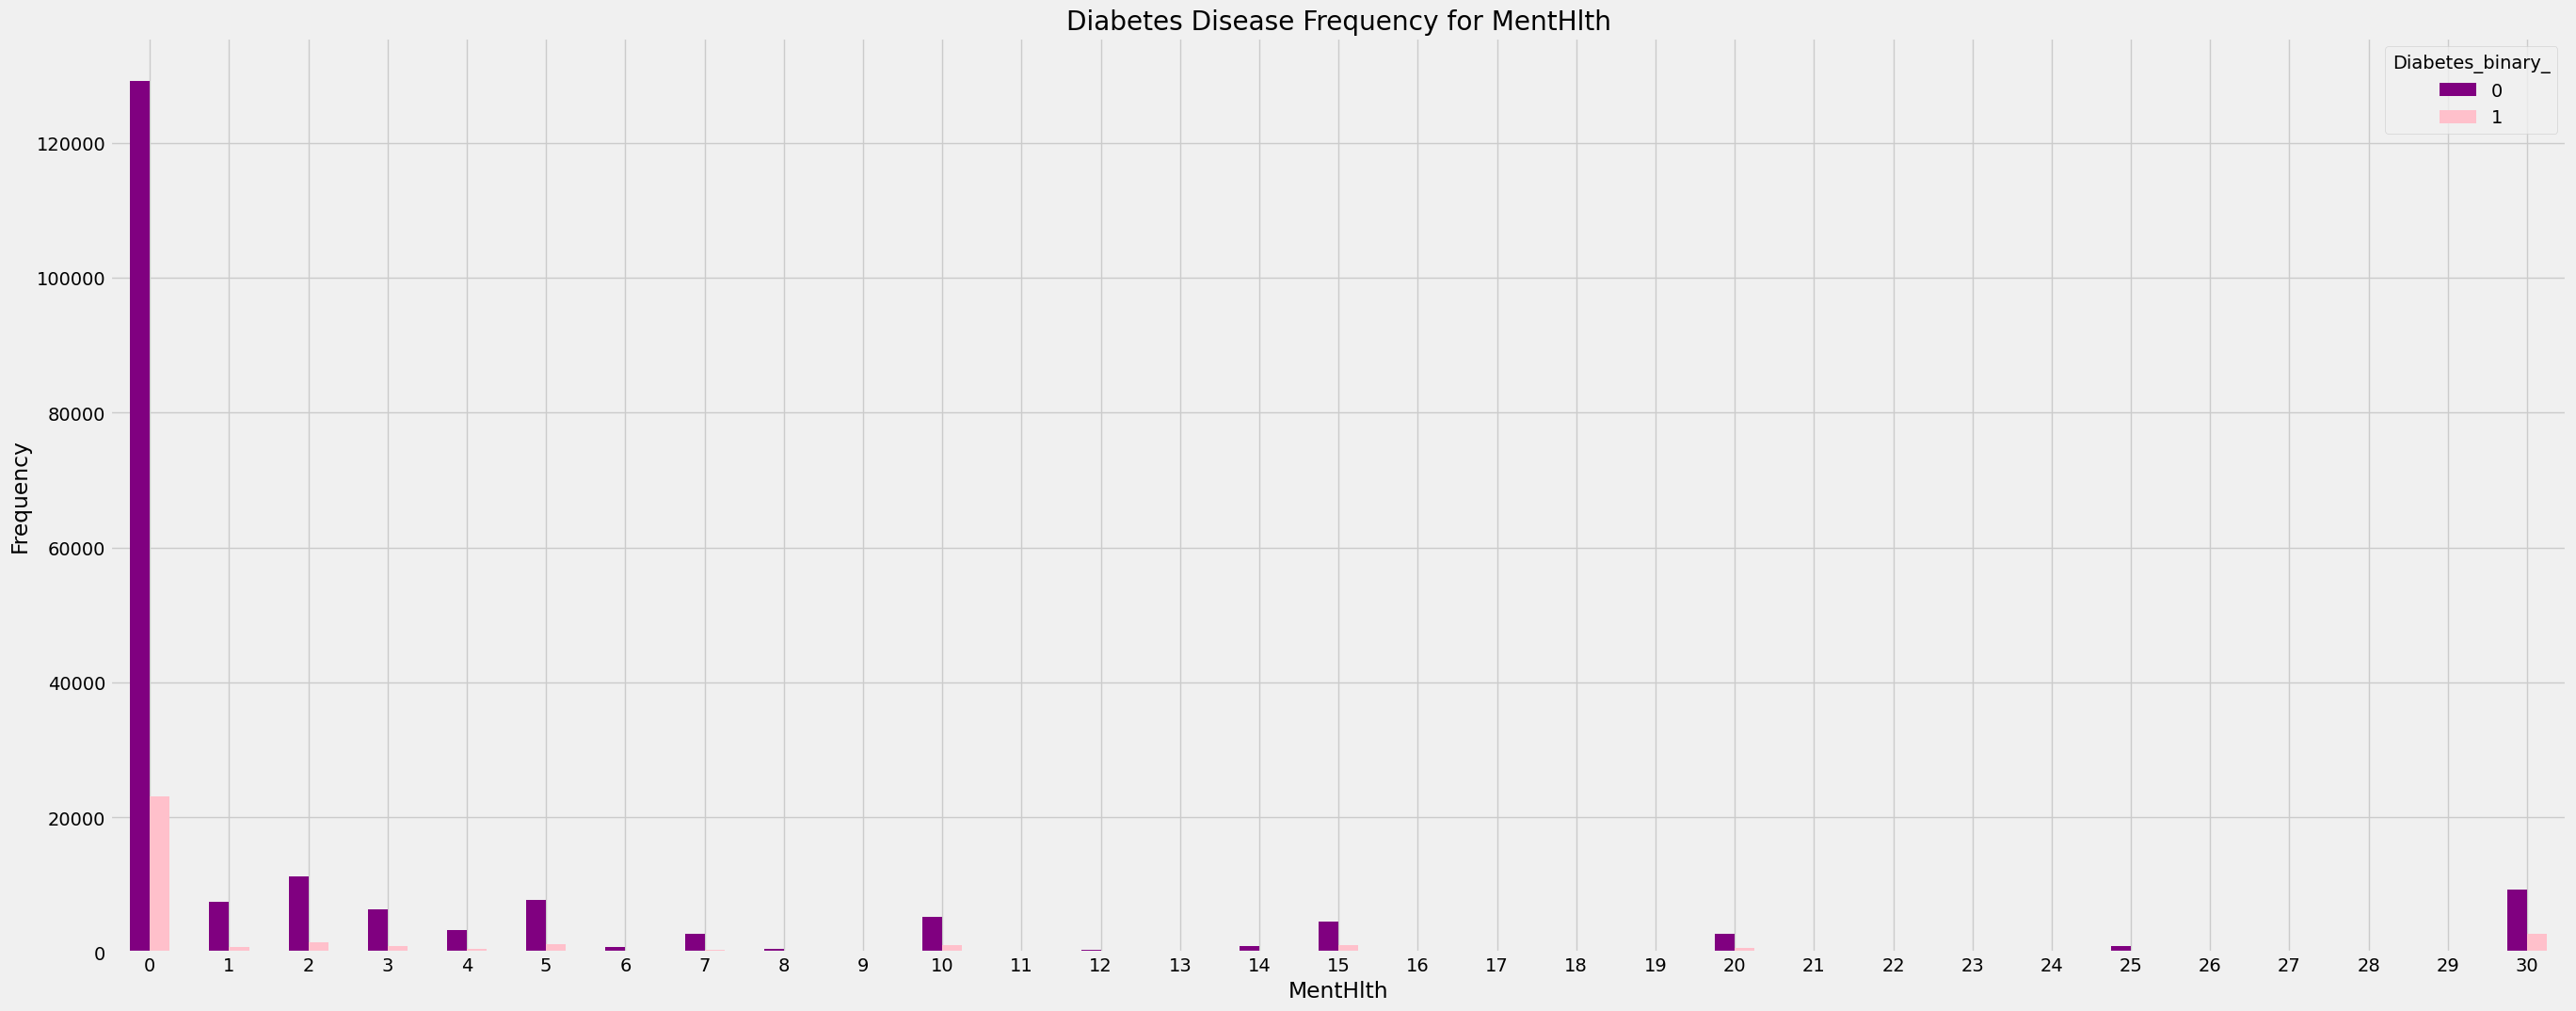

In [39]:
pd.crosstab(df.MentHlth,df.Diabetes_binary_).plot(kind="bar",figsize=(30,12),color=['purple', 'pink' ])
plt.title('Diabetes Disease Frequency for Mental Health')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Plot Relation with physical Health**




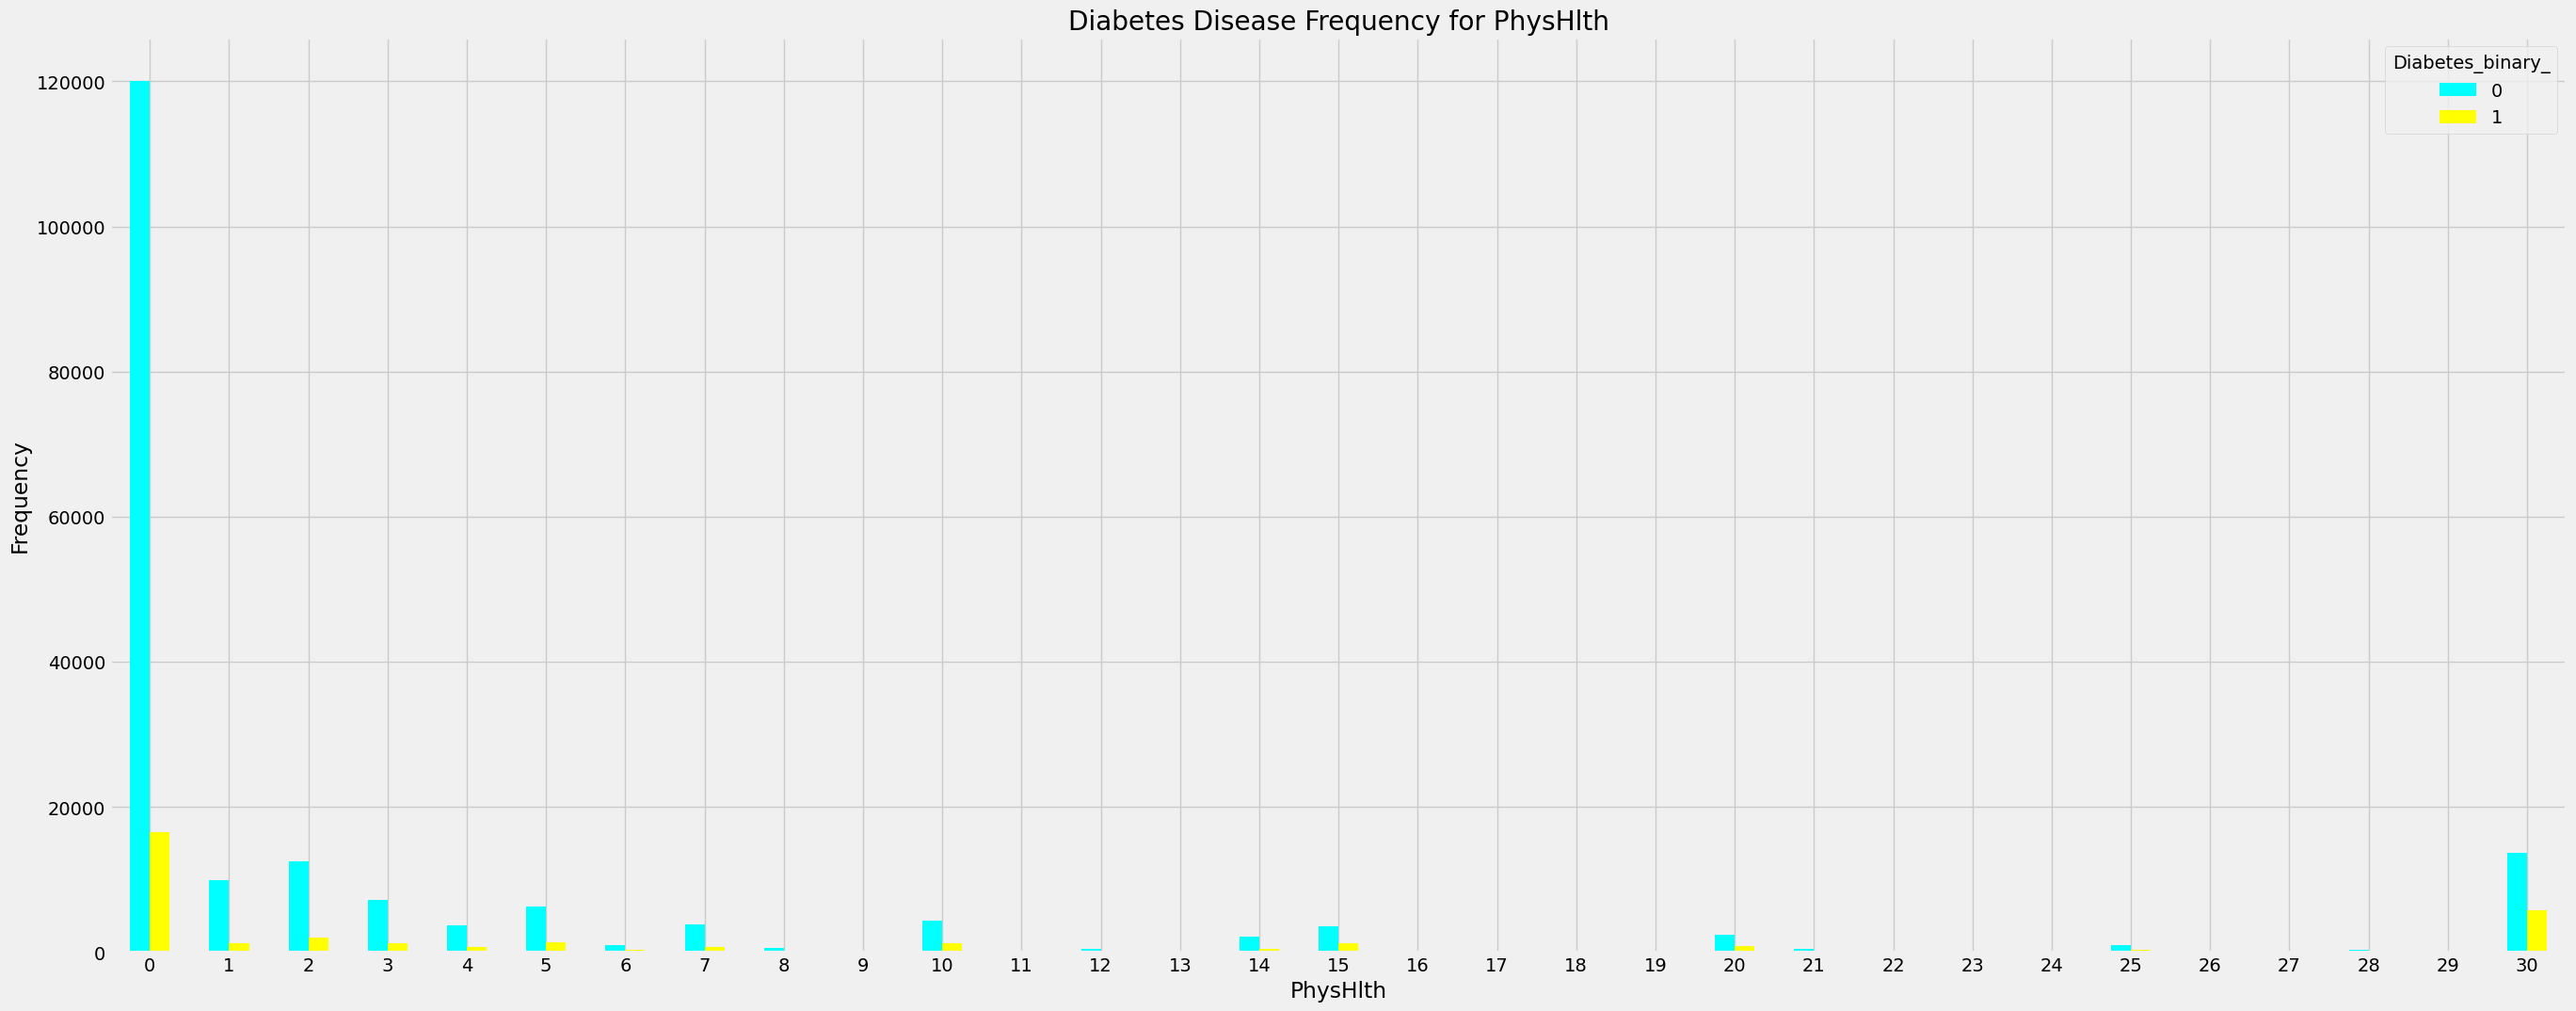

In [40]:
pd.crosstab(df.PhysHlth,df.Diabetes_binary_).plot(kind="bar",figsize=(30,12),color=['Cyan', 'Yellow' ])
plt.title('Diabetes Disease Frequency for Physical Health')
plt.xlabel('PhysHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

**Plot Relation with GenHealth**

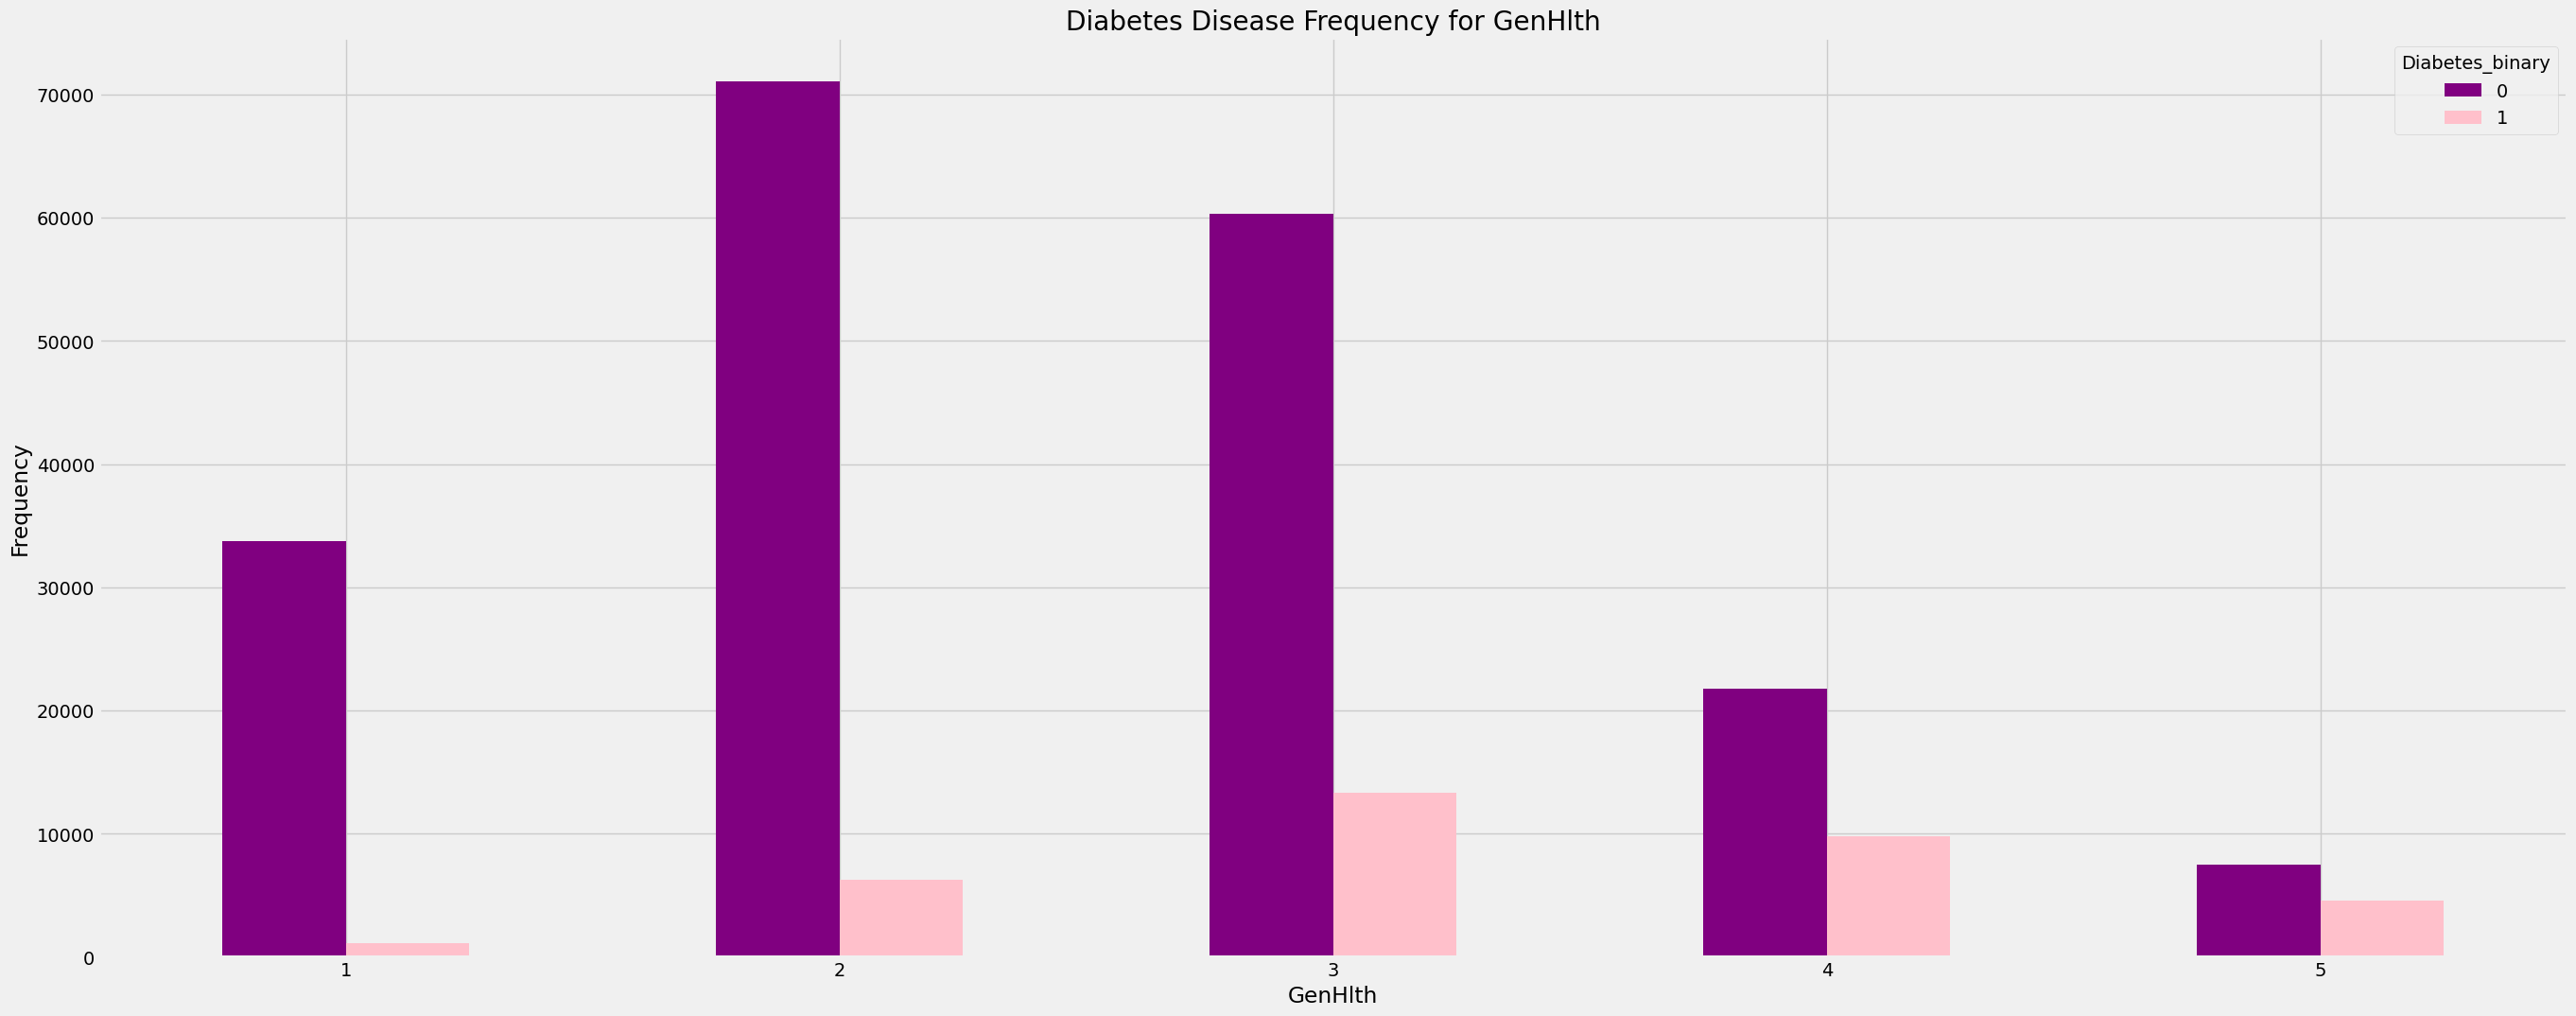

In [41]:
pd.crosstab(df.GenHlth,df.Diabetes_binary).plot(kind="bar",figsize=(30,12),color=['Purple', 'pink' ])
plt.title('Diabetes Disease Frequency for General Health')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### Heart Disease/Attack Correlation Factors

**Pivot Table for Hearth Disease/Attack versus Another Binary Variables**


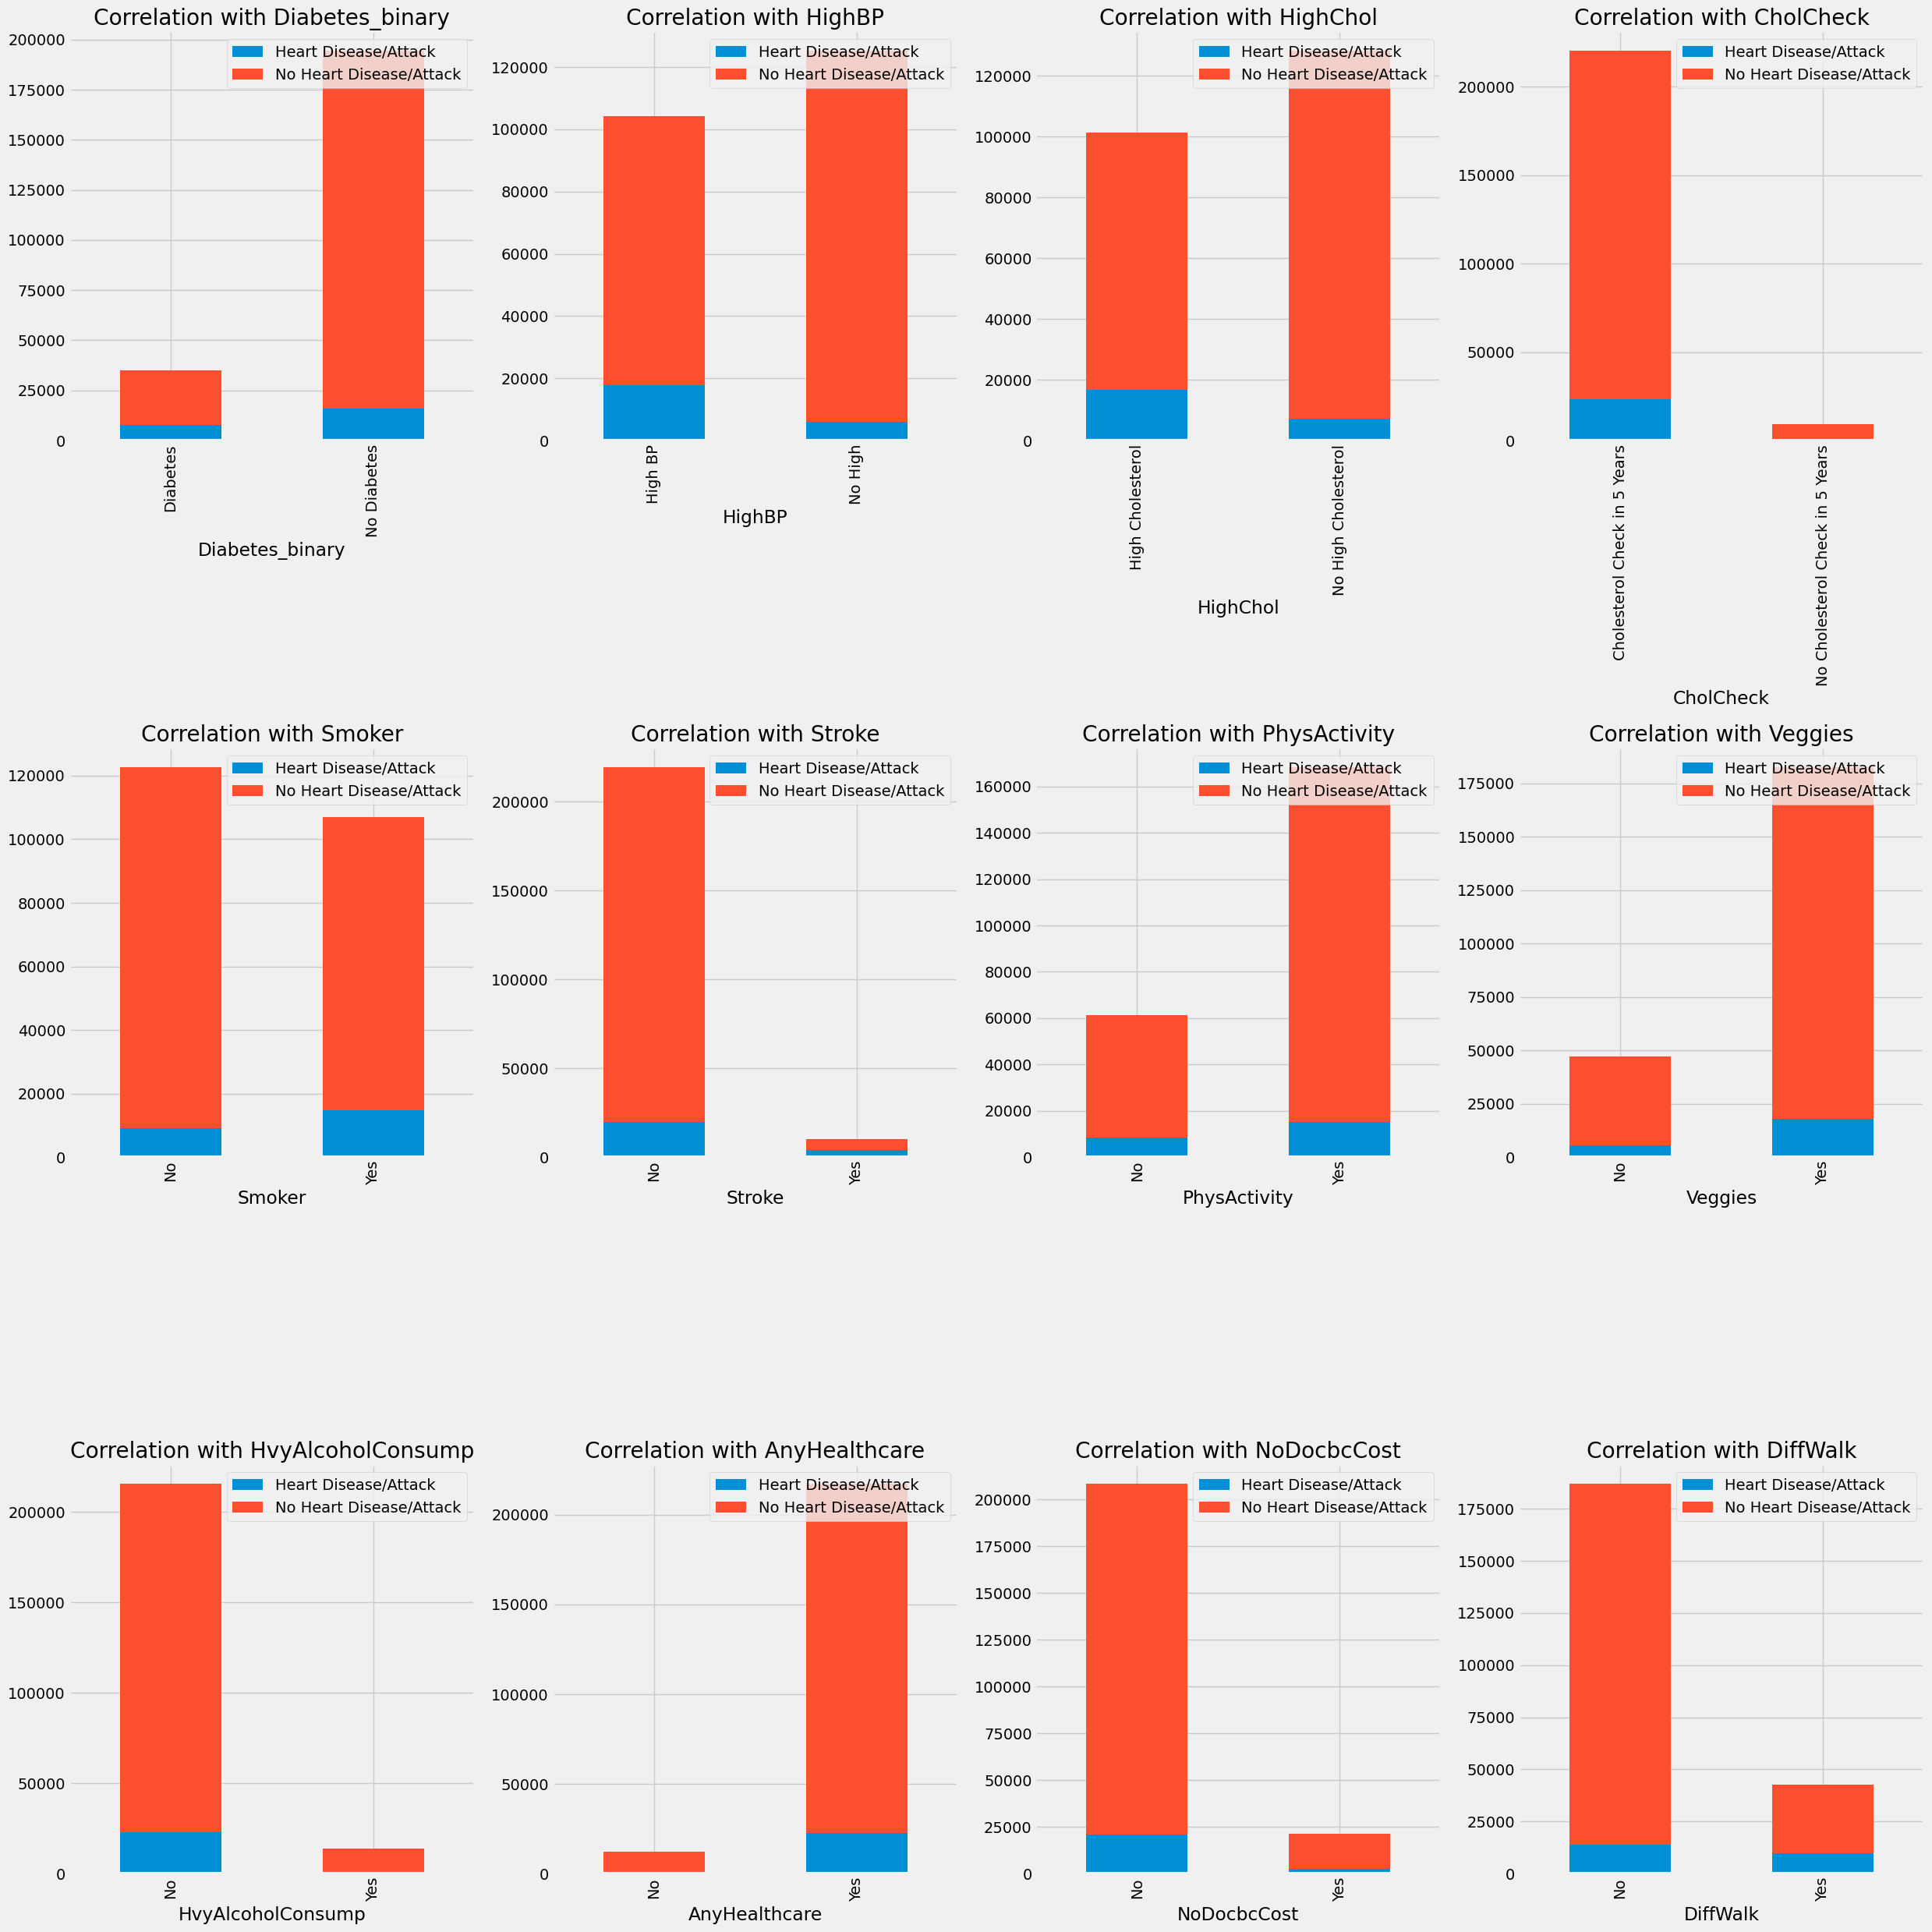

In [42]:
def create_plot_pivot_heart_disease(df_2, x_column):
    _df_plot = df_2.groupby([x_column, 'HeartDiseaseorAttack']).size() \
        .reset_index().pivot(columns='HeartDiseaseorAttack', index=x_column, values=0)
    return _df_plot

# Set the visualization size
fig, ax = plt.subplots(3, 4, figsize=(25, 25))
axe = ax.ravel()

# Mendefinisikan variabel biner yang akan dianalisis
biner_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
              'Smoker', 'Stroke', 'PhysActivity', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Perform plotting for each binary variable against Heart Disease
for i in range(len(biner_vars)):
    plot_data = create_plot_pivot_heart_disease(df_2, biner_vars[i])
    # Create a stacked plot that shows minority data at the bottom of the graph
    plot_data.iloc[:, ::-1].plot(kind='bar', stacked=True, ax=axe[i])  # Reverse the stack order
    axe[i].set_xlabel(biner_vars[i])
    axe[i].set_title(f'Correlation with {biner_vars[i]}')
    axe[i].legend(['Heart Disease/Attack', 'No Heart Disease/Attack'], loc='upper right')  # Reverse the order of the legend

fig.tight_layout()
plt.show()

In [43]:
df_2["HeartDiseaseorAttack"].value_counts()

HeartDiseaseorAttack
No     205761
Yes     23713
Name: count, dtype: int64

### Stroke Correlation Factor

**Pivot Table for Stroke versus Another Binary Variables**

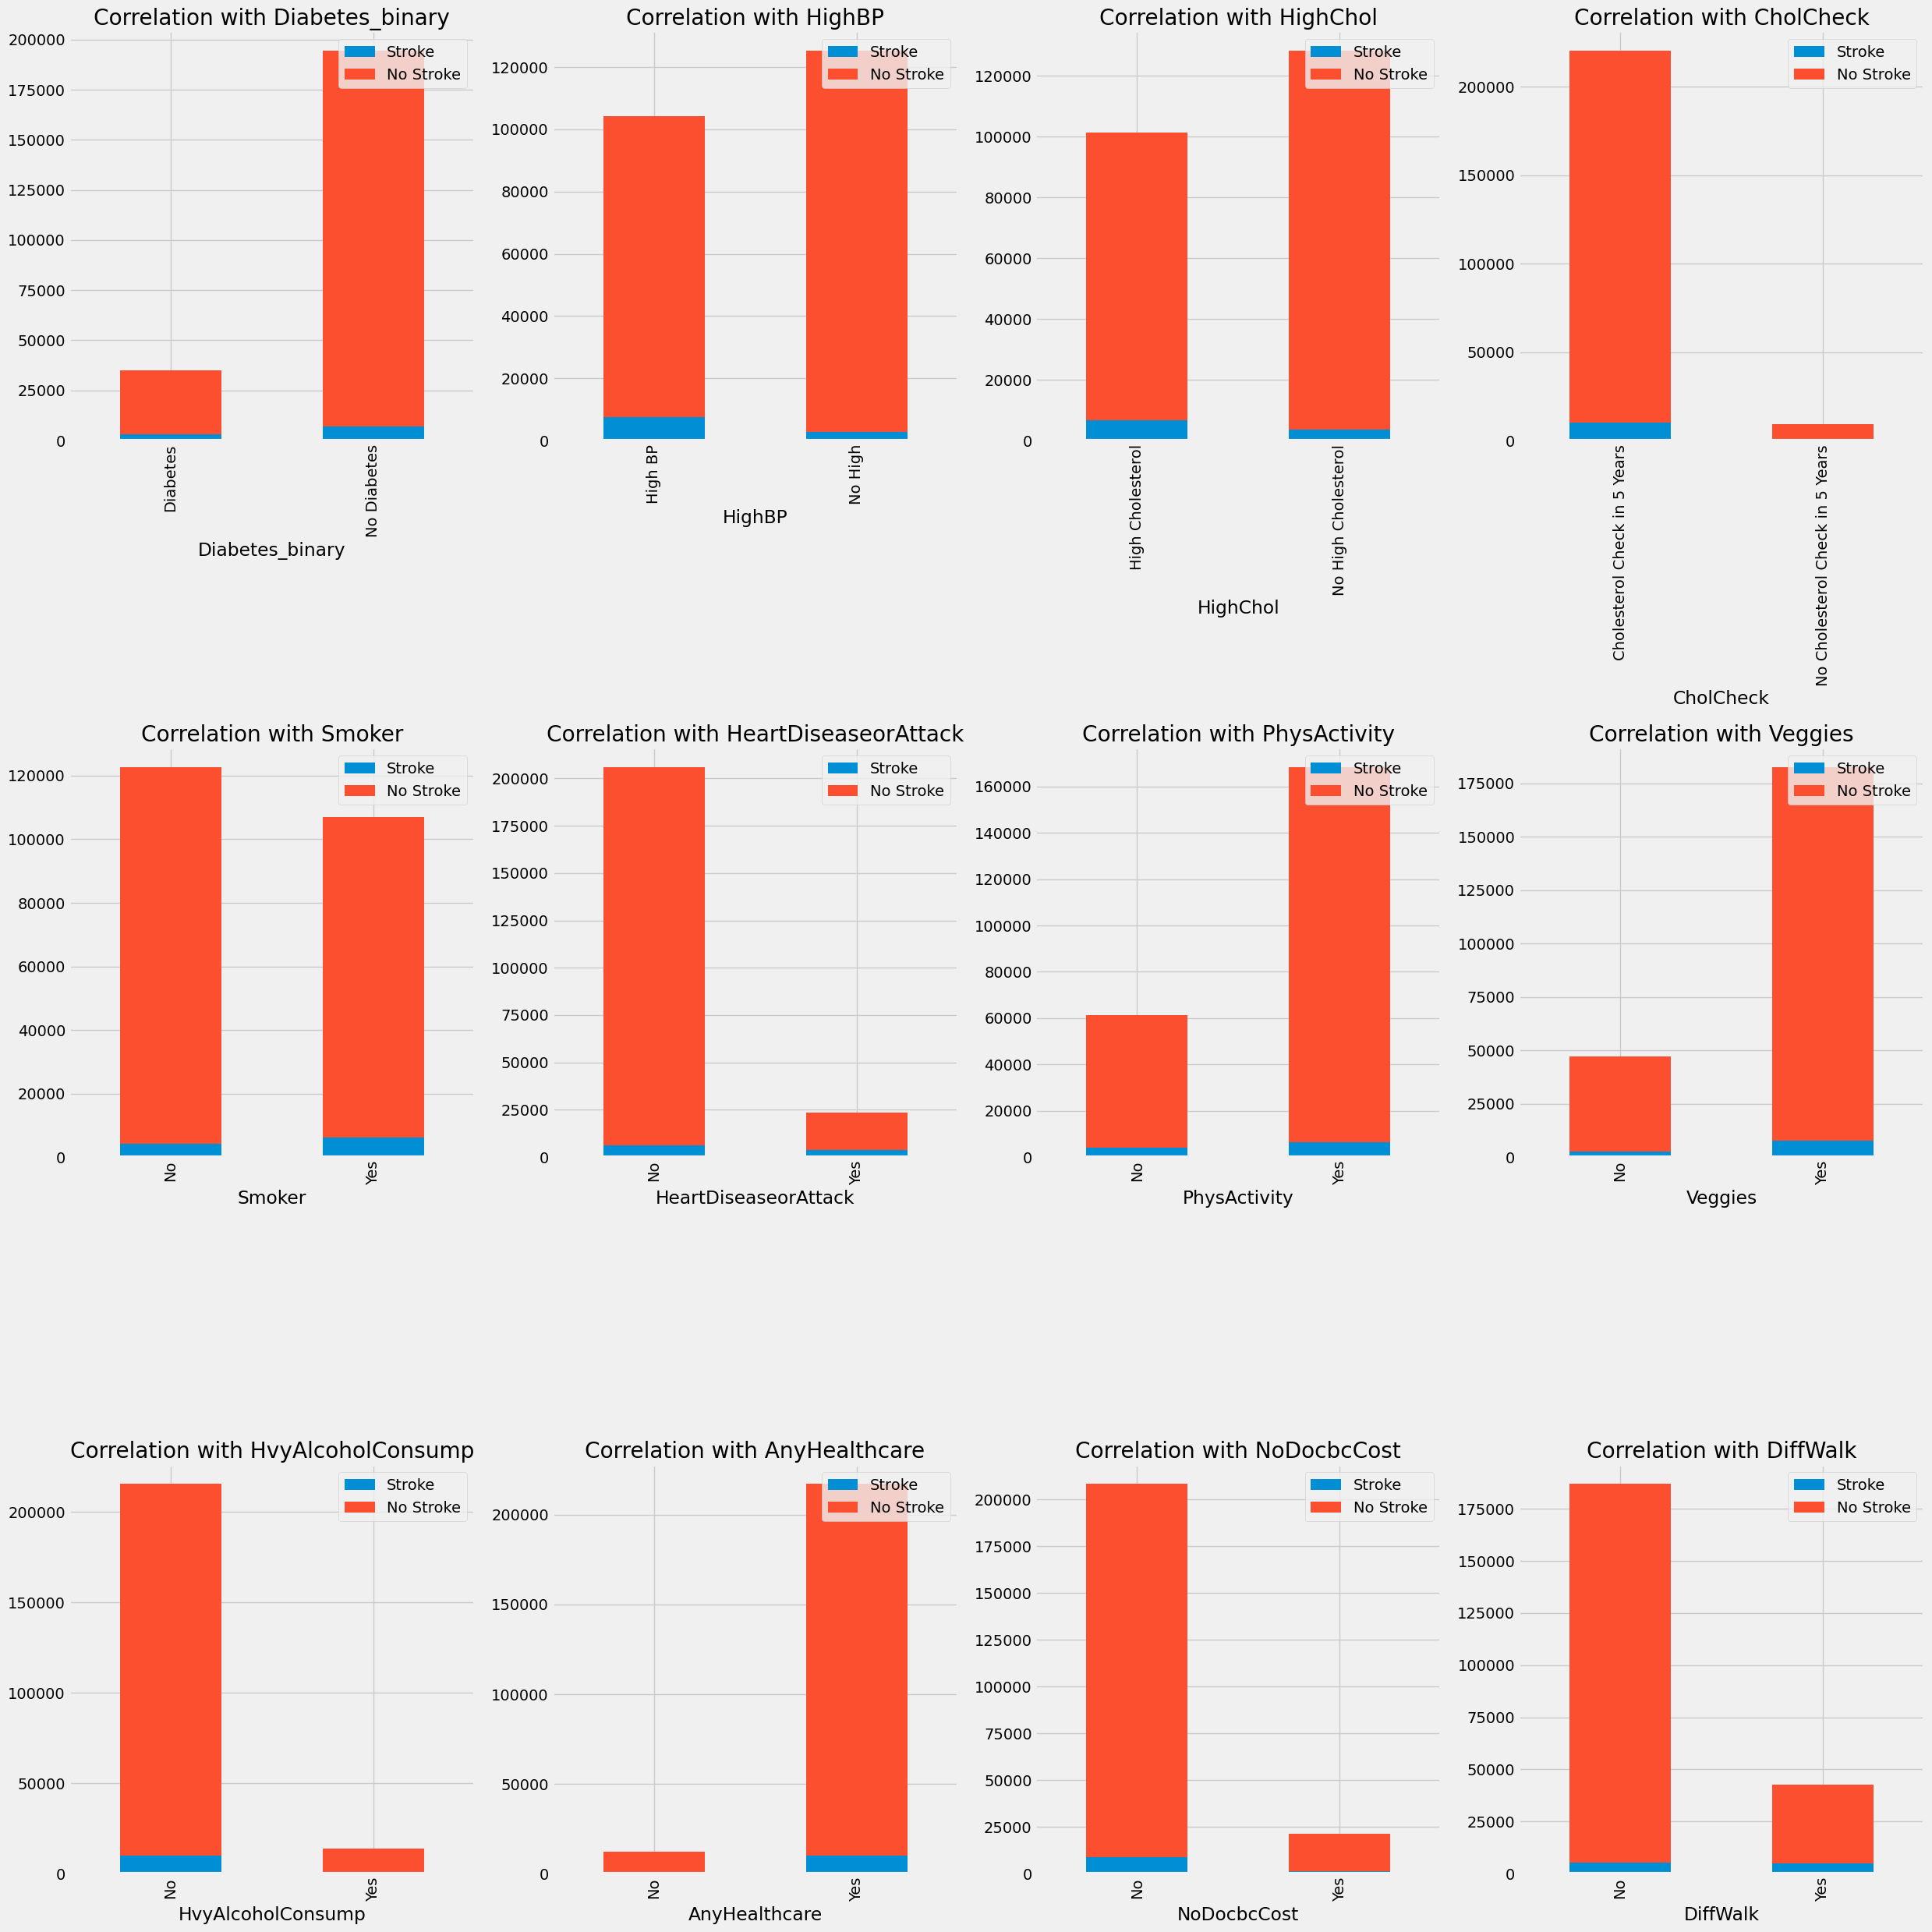

In [44]:
def create_plot_pivot_stroke(df_2, x_column):
    _df_plot = df_2.groupby([x_column, 'Stroke']).size() \
        .reset_index().pivot(columns='Stroke', index=x_column, values=0)
    return _df_plot

# Set the visualization size
fig, ax = plt.subplots(3, 4, figsize=(25, 25))
axe = ax.ravel()

# Mendefinisikan variabel biner yang akan dianalisis
biner_vars = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck',
              'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Perform plotting for each binary variable against Stroke
for i in range(len(biner_vars)):
    plot_data = create_plot_pivot_stroke(df_2, biner_vars[i])
    # Create a stacked plot that shows minority data at the bottom of the graph
    plot_data.iloc[:, ::-1].plot(kind='bar', stacked=True, ax=axe[i])
    axe[i].set_xlabel(biner_vars[i])
    axe[i].set_title(f'Correlation with {biner_vars[i]}')
    axe[i].legend(['Stroke', 'No Stroke'], loc='upper right')

fig.tight_layout()
plt.show()

In [45]:
df_2["Stroke"].value_counts()

Stroke
No     219190
Yes     10284
Name: count, dtype: int64

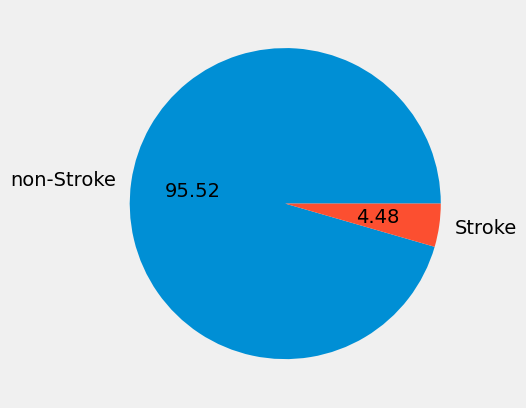

In [46]:
labels=["non-Stroke","Stroke"]
plt.pie(df_2["Stroke"].value_counts() , labels =labels,autopct='%.02f' );

# Bivariat Analysis

 **Heatmap Correlation**

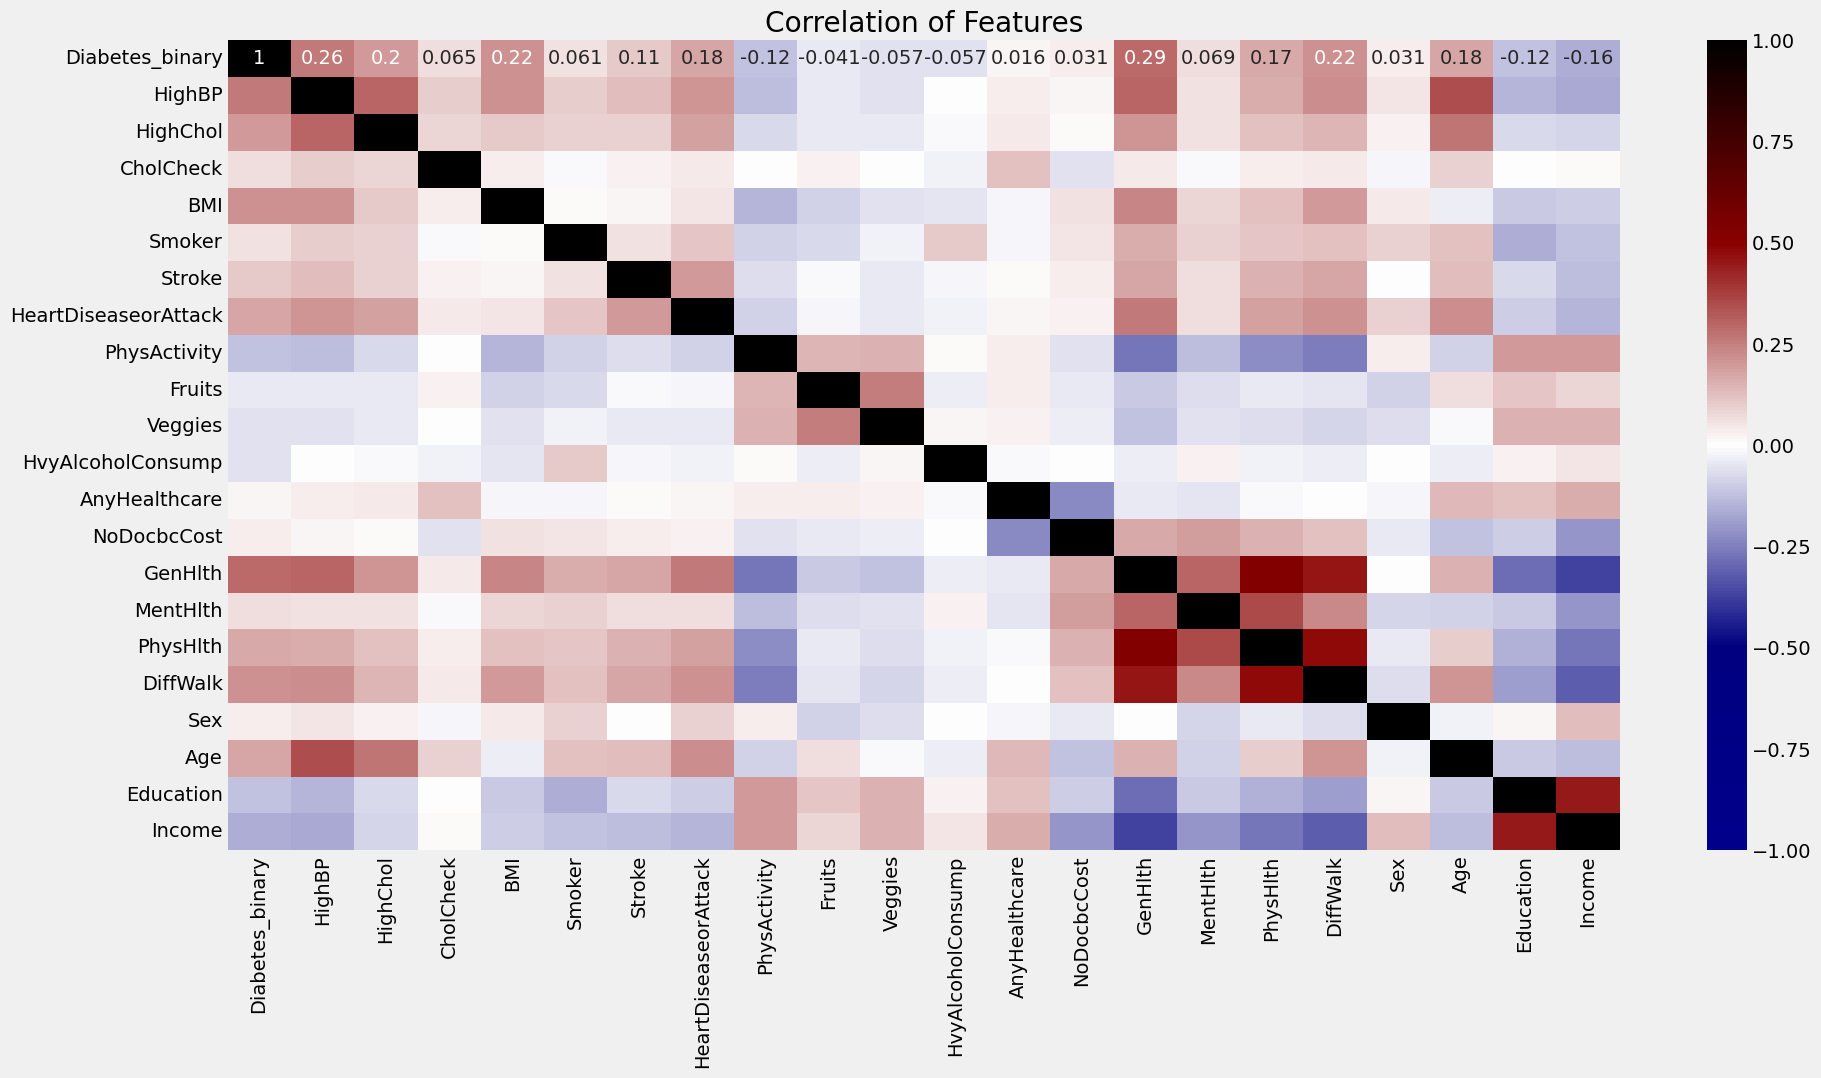

In [54]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0, 'darkblue'), (0.25, 'navy'), (0.5, 'white'), (0.75, 'darkred') , (1, 'black')]
cmap = LinearSegmentedColormap.from_list('custom', colors)
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title("Correlation of Features")
plt.savefig('correlation_02.jpeg')
plt.show()

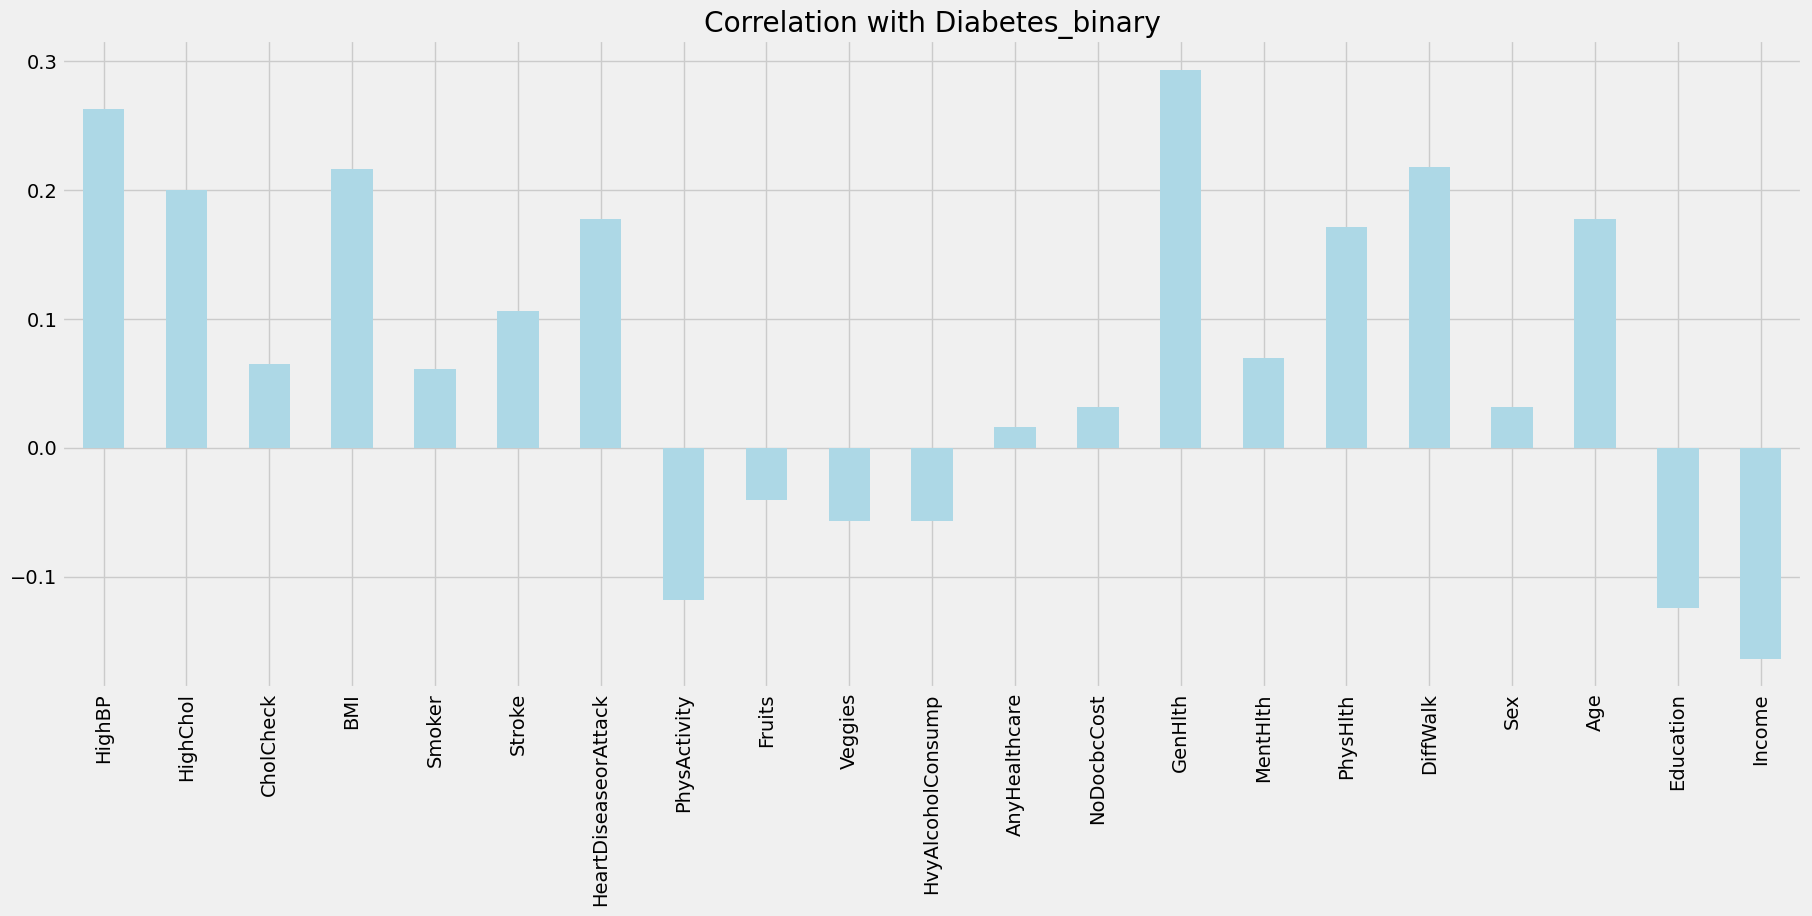

In [55]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="lightblue");

Conclusion:
Strong Correlation: (GenHlth, PhysHlth),
Moderate Corellation: (PhysHlth, DiffWalk), (GenHlth, DiffWalk), (PhysHlth, MentHlth), (Education, Income), (HighBP, Age) are moderately correleted with each other as positive relation meanwhile (GenHlth, Income), (DiffWalk, Income) are moderately correlated with each other as negative relation

## VIF Test

In [59]:
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(df)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   116.856706
Diabetes_binary           1.193120
HighBP                    1.344502
HighChol                  1.180932
CholCheck                 1.033501
BMI                       1.160280
Smoker                    1.091872
Stroke                    1.081612
HeartDiseaseorAttack      1.175776
PhysActivity              1.157396
Fruits                    1.112540
Veggies                   1.112397
HvyAlcoholConsump         1.025418
AnyHealthcare             1.113209
NoDocbcCost               1.144200
GenHlth                   1.821914
MentHlth                  1.239497
PhysHlth                  1.623288
DiffWalk                  1.536636
Sex                       1.075748
Age                       1.354954
Education                 1.326495
Income                    1.505649
dtype: float64


## ANOVA Test

In [61]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(253680, 10)


In [62]:
pd.DataFrame(X_selected).head(3)

0    1     2    3    4     5    6    7    8    9
0  1.0  1.0  40.0  0.0  5.0  15.0  1.0  9.0  4.0  3.0
1  0.0  0.0  25.0  0.0  3.0   0.0  0.0  7.0  6.0  1.0
2  1.0  1.0  28.0  0.0  5.0  30.0  1.0  9.0  4.0  8.0

## Chi Square

In [66]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

f_Scores_sorted = f_Scores.sort_values(by='Score', ascending=False)
display(f_Scores_sorted)

Feature          Score
15              PhysHlth  133424.406534
14              MentHlth   21029.632228
3                    BMI   18355.166400
16              DiffWalk   10059.506391
0                 HighBP   10029.013935
13               GenHlth    9938.507776
18                   Age    9276.141199
6   HeartDiseaseorAttack    7221.975378
1               HighChol    5859.710582
20                Income    4829.816361
5                 Stroke    2725.225194
7           PhysActivity     861.887532
10     HvyAlcoholConsump     779.424807
19             Education     756.035496
4                 Smoker     521.978858
12           NoDocbcCost     229.542412
8                 Fruits     154.291404
9                Veggies     153.169215
17                   Sex     140.248274
2              CholCheck      39.716825
11         AnyHealthcare       3.280938

We will drop column "Fruits" , "Veggies" , "Sex" , "CholCheck" , " AnyHealthcare" 

In [12]:
colomns = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]

In [13]:
df.drop(colomns , axis= 1 ,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   BMI                   229474 non-null  int64
 4   Smoker                229474 non-null  int64
 5   Stroke                229474 non-null  int64
 6   HeartDiseaseorAttack  229474 non-null  int64
 7   PhysActivity          229474 non-null  int64
 8   HvyAlcoholConsump     229474 non-null  int64
 9   NoDocbcCost           229474 non-null  int64
 10  GenHlth               229474 non-null  int64
 11  MentHlth              229474 non-null  int64
 12  PhysHlth              229474 non-null  int64
 13  DiffWalk              229474 non-null  int64
 14  Age                   229474 non-null  int64
 15  Education             229474 non-null  

In [61]:
df.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       229474.0   0.152945  0.359936   0.0   0.0   0.0   0.0   
HighBP                229474.0   0.454343  0.497912   0.0   0.0   0.0   1.0   
HighChol              229474.0   0.441640  0.496584   0.0   0.0   0.0   1.0   
BMI                   229474.0  28.687507  6.789204  12.0  24.0  27.0  32.0   
Smoker                229474.0   0.465800  0.498830   0.0   0.0   0.0   1.0   
Stroke                229474.0   0.044816  0.206899   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  229474.0   0.103336  0.304398   0.0   0.0   0.0   0.0   
PhysActivity          229474.0   0.733042  0.442371   0.0   0.0   1.0   1.0   
HvyAlcoholConsump     229474.0   0.060791  0.238947   0.0   0.0   0.0   0.0   
NoDocbcCost           229474.0   0.092921  0.290323   0.0   0.0   0.0   0.0   
GenHlth               229474.0   2.601820  1.064962   1.0   2.0   3.0   3.0   
MentHlth              229474.0   3.509866  7.717643   0.0   0.0   0.0   2.0   
PhysHlth              229474.0   4.681219  9.050877   0.0   0.0   0.0   4.0   
DiffWalk              229474.0   0.185751  0.388906   0.0   0.0   0.0   0.0   
Age                   229474.0   8.085068  3.094451   1.0   6.0   8.0  10.0   
Education             229474.0   4.979741  0.992989   1.0   4.0   5.0   6.0   
Income                229474.0   5.888615  2.092888   1.0   4.0   6.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
HvyAlcoholConsump      1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

# Data Prepocessing

## Operational Variable

In [15]:
X=df.drop("Diabetes_binary",axis=1)
Y=df["Diabetes_binary"]

## Treatment for imbalance dataset

In [16]:
Y.value_counts()

Diabetes_binary
0    194377
1     35097
Name: count, dtype: int64

In [17]:
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm = nm.fit_resample(X,Y)

In [18]:
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [19]:
y_sm.value_counts()

Diabetes_binary
0    35097
1    35097
Name: count, dtype: int64

In [20]:
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=37)

## Data Scalling

In [21]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Machine Learning Model

## **SVM**

SVM Evaluation
Training set score: 0.8668
Test set score: 0.8664
Mean Squared Error : 0.13357709292938885
Root Mean Squared Error : 0.3654820008282061


              precision    recall  f1-score   support

           0       0.81      0.95      0.88     10629
           1       0.94      0.78      0.85     10430

    accuracy                           0.87     21059
   macro avg       0.88      0.87      0.87     21059
weighted avg       0.88      0.87      0.87     21059



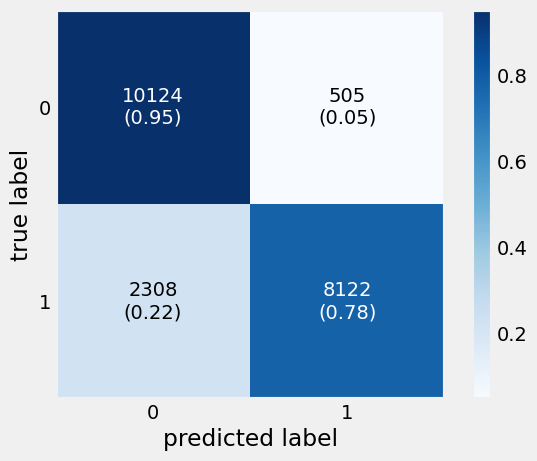

In [51]:
from sklearn.svm import SVC

# define the model
svm = SVC(kernel='rbf', C=1.0)

# train the model
svm.fit(X_train, Y_train)

y_pred_svm =svm.predict(X_test)

print('SVM Evaluation')
print('Training set score: {:.4f}'.format(svm.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(svm.score(X_test, Y_test)))

#check MSE & RMSE 
mse_svm =mean_squared_error(Y_test, y_pred_svm)
print('Mean Squared Error : '+ str(mse_svm))
rmse_svm = math.sqrt(mean_squared_error(Y_test, y_pred_svm))
print('Root Mean Squared Error : '+ str(rmse_svm))
print('\n')

matrix = classification_report(Y_test,y_pred_svm )
print(matrix)

# calculating and plotting the confusion matrix
cm_svm = confusion_matrix(Y_test,y_pred_svm)
plot_confusion_matrix(conf_mat=cm_svm,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## XGBoost

XGBoost Evaluation
Training set score: 0.8738
Test set score: 0.7634
Mean Squared Error : 0.23657343653544802
Root Mean Squared Error : 0.4863881541890674


              precision    recall  f1-score   support

           0       0.85      0.65      0.73     10629
           1       0.71      0.88      0.79     10430

    accuracy                           0.76     21059
   macro avg       0.78      0.76      0.76     21059
weighted avg       0.78      0.76      0.76     21059



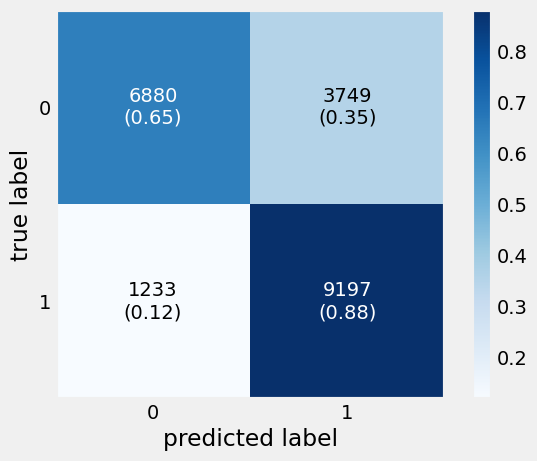

In [50]:
from xgboost import XGBClassifier
xg = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xg.fit(X_train , Y_train)

y_pred_xg = xg.predict(X_test)
print('XGBoost Evaluation')
print('Training set score: {:.4f}'.format(xg.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(xg.score(X_test, Y_test)))

#check MSE & RMSE 
mse_xg =mean_squared_error(Y_test, y_pred_xg)
print('Mean Squared Error : '+ str(mse_xg))
rmse_xg = math.sqrt(mean_squared_error(Y_test, y_pred_xg))
print('Root Mean Squared Error : '+ str(rmse_xg))
print('\n')

matrix = classification_report(Y_test,y_pred_xg )
print(matrix)

# calculating and plotting the confusion matrix
cm_xg = confusion_matrix(Y_test,y_pred_xg)
plot_confusion_matrix(conf_mat=cm_xg,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Random Forest

Random Forest Evaluation
Training set score: 0.8705
Test set score: 0.8634
Mean Squared Error : 0.1365686879718885
Root Mean Squared Error : 0.36955200983337716


              precision    recall  f1-score   support

           0       0.81      0.96      0.88     10629
           1       0.95      0.77      0.85     10430

    accuracy                           0.86     21059
   macro avg       0.88      0.86      0.86     21059
weighted avg       0.88      0.86      0.86     21059



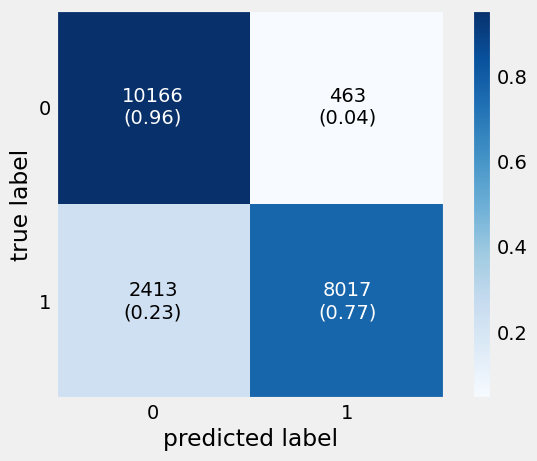

In [52]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

# fitting the model on the train data
rf.fit(X_train, Y_train)

# make predictions on test set
y_pred_rf = rf.predict(X_test)

print('Random Forest Evaluation')
print('Training set score: {:.4f}'.format(rf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(rf.score(X_test, Y_test)))

#check MSE & RMSE 
mse_rf =mean_squared_error(Y_test, y_pred_rf)
print('Mean Squared Error : '+ str(mse_rf))
rmse_rf = math.sqrt(mean_squared_error(Y_test, y_pred_rf))
print('Root Mean Squared Error : '+ str(rmse_rf))
print('\n')

matrix = classification_report(Y_test,y_pred_rf )
print(matrix)

# calculating and plotting the confusion matrix
cm_rf = confusion_matrix(Y_test,y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Naive Bayes

Naive Bayes Evaluation
Training set score: 0.8140
Test set score: 0.8144
Mean Squared Error : 0.18562134954176363
Root Mean Squared Error : 0.43083796204810415


              precision    recall  f1-score   support

           0       0.75      0.95      0.84     10629
           1       0.93      0.68      0.78     10430

    accuracy                           0.81     21059
   macro avg       0.84      0.81      0.81     21059
weighted avg       0.84      0.81      0.81     21059



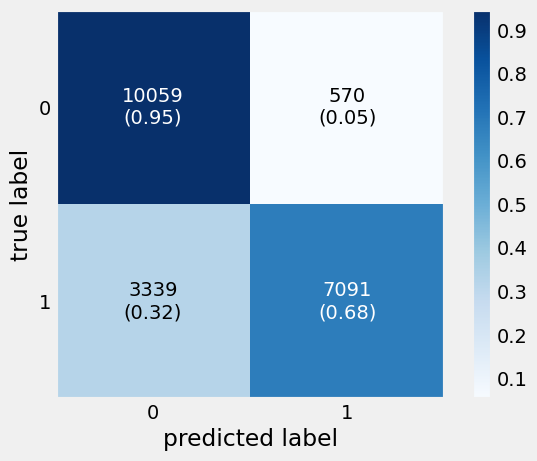

In [53]:
from sklearn.naive_bayes import GaussianNB

# define the model
gnb = GaussianNB()

# train the model
gnb.fit(X_train, Y_train)

y_pred_gnb = gnb.predict(X_test)

print('Naive Bayes Evaluation')
print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

# check MSE & RMSE
mse_gnb = mean_squared_error(Y_test, y_pred_gnb)
print('Mean Squared Error : ' + str(mse_gnb))
rmse_gnb = math.sqrt(mean_squared_error(Y_test, y_pred_gnb))
print('Root Mean Squared Error : ' + str(rmse_gnb))
print('\n')

matrix = classification_report(Y_test, y_pred_gnb)
print(matrix)

# calculating and plotting the confusion matrix
cm_gnb = confusion_matrix(Y_test, y_pred_gnb)
plot_confusion_matrix(conf_mat=cm_gnb, show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.show()

## ANN

Epoch 1/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8268 - loss: 0.3846 - val_accuracy: 0.8644 - val_loss: 0.3204
Epoch 2/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8641 - loss: 0.3196 - val_accuracy: 0.8666 - val_loss: 0.3134
Epoch 3/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8685 - loss: 0.3088 - val_accuracy: 0.8624 - val_loss: 0.3172
Epoch 4/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8725 - loss: 0.3040 - val_accuracy: 0.8669 - val_loss: 0.3101
Epoch 5/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8697 - loss: 0.3028 - val_accuracy: 0.8682 - val_loss: 0.3057
Epoch 6/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8728 - loss: 0.2979 - val_accuracy: 0.8703 - val_loss: 0.3000
Epoch 7/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.2985 - val_accuracy: 0.8751 - val_loss: 0.2940
Epoch 8/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8749 - loss: 0.2929 - 

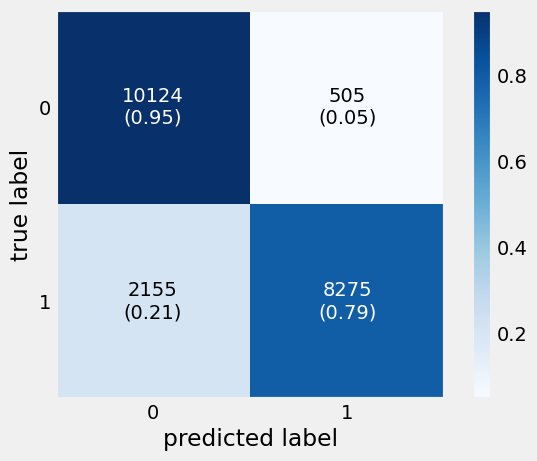

In [54]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model_ann = Sequential()
model_ann.add(Dense(64, activation='relu', input_dim=X_train.shape[1])) # Input layer
model_ann.add(Dense(64, activation='relu')) # Hidden layer
model_ann.add(Dense(1, activation='sigmoid')) # Output layer

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_ann.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
train_score_ann = model_ann.evaluate(X_train, Y_train, verbose=0)
test_score_ann = model_ann.evaluate(X_test, Y_test, verbose=0)

print('ANN Evaluation')
print('Training set accuracy: {:.4f}'.format(train_score_ann[1]))
print('Test set accuracy: {:.4f}'.format(test_score_ann[1]))

# Predictions
y_pred_prob_ann = model_ann.predict(X_test)
y_pred_ann = (y_pred_prob > 0.5).astype(int)

# Check MSE & RMSE
mse_ann = mean_squared_error(Y_test, y_pred_ann)
print('Mean Squared Error: {:.4f}'.format(mse_ann))
rmse_ann = math.sqrt(mse_ann)
print('Root Mean Squared Error: {:.4f}'.format(rmse_ann))
print('\n')

# Classification report
matrix = classification_report(Y_test, y_pred_ann)
print(matrix)

# Calculating and plotting the confusion matrix
cm_ann = confusion_matrix(Y_test, y_pred_ann)
plot_confusion_matrix(cm_ann, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

## Tuning Best Model (ANN)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create ANN model
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1])) # Input layer
    model.add(Dense(64, activation='relu')) # Hidden layer
    model.add(Dense(1, activation='sigmoid')) # Output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
}

# Create GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform Grid Search Cross Validation
grid_result = grid.fit(X_train, Y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.856172 using {'optimizer': 'rmsprop'}
0.855968 (0.001277) with: {'optimizer': 'adam'}
0.856172 (0.001824) with: {'optimizer': 'rmsprop'}


## Running Tuning Model ANN

Epoch 1/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8283 - loss: 0.3790 - val_accuracy: 0.8616 - val_loss: 0.3233
Epoch 2/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8585 - loss: 0.3286 - val_accuracy: 0.8646 - val_loss: 0.3161
Epoch 3/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8670 - loss: 0.3168 - val_accuracy: 0.8700 - val_loss: 0.3126
Epoch 4/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8680 - loss: 0.3119 - val_accuracy: 0.8681 - val_loss: 0.3118
Epoch 5/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.3094 - val_accuracy: 0.8716 - val_loss: 0.3071
Epoch 6/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8749 - loss: 0.2994 - val_accuracy: 0.8699 - val_loss: 0.3060
Epoch 7/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8704 - loss: 0.3040 - val_accuracy: 0.8716 - val_loss: 0.3042
Epoch 8/10
1536/1536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8727 - loss: 0.3017 - 

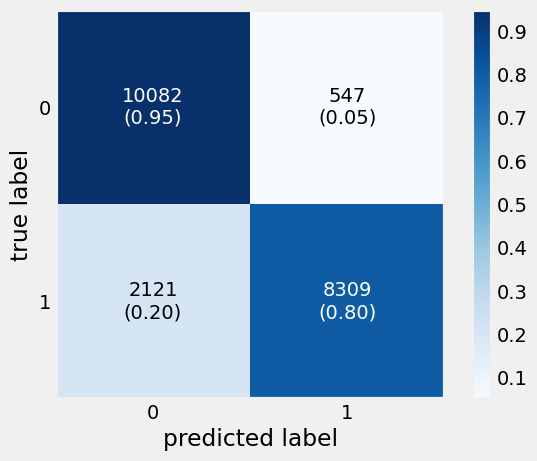

In [55]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model_ann2 = Sequential()
model_ann2.add(Dense(64, activation='relu', input_dim=X_train.shape[1])) # Input layer
model_ann2.add(Dense(64, activation='relu')) # Hidden layer
model_ann2.add(Dense(1, activation='sigmoid')) # Output layer

# Compile the model with the best optimizer found
model_ann2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_ann2.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model
train_score_ann2 = model_ann2.evaluate(X_train, Y_train, verbose=0)
test_score_ann2 = model_ann2.evaluate(X_test, Y_test, verbose=0)

print('Training set accuracy: {:.4f}'.format(train_score_ann2[1]))
print('Test set accuracy: {:.4f}'.format(test_score_ann2[1]))

# Predictions
y_pred_prob_ann2 = model_ann2.predict(X_test)
y_pred_ann2 = (y_pred_prob_ann2 > 0.5).astype(int)

# Check MSE & RMSE
mse_ann2 = mean_squared_error(Y_test, y_pred_ann2)
print('Mean Squared Error: {:.4f}'.format(mse_ann2))
rmse_ann2 = math.sqrt(mse_ann2)
print('Root Mean Squared Error: {:.4f}'.format(rmse_ann2))

# Classification report
matrix = classification_report(Y_test, y_pred_ann2)
print(matrix)

# Calculating and plotting the confusion matrix
cm_ann2 = confusion_matrix(Y_test, y_pred_ann2)
plot_confusion_matrix(cm_ann2, show_absolute=True, show_normed=True, colorbar=True)
plt.show()

In [57]:
import pandas as pd

# Data for all models
models_data = {
    'Model': ['SVM', 'XGBoost', 'Random Forest', 'Naive Bayes', 'ANN'],
    'Training set accuracy': [svm.score(X_train, Y_train), xg.score(X_train, Y_train),
                              rf.score(X_train, Y_train), gnb.score(X_train, Y_train),
                              train_score_ann[1]],
    'Test set accuracy': [svm.score(X_test, Y_test), xg.score(X_test, Y_test),
                          rf.score(X_test, Y_test), gnb.score(X_test, Y_test),
                          test_score_ann[1]],
    'MSE': [mse_svm, mse_xg, mse_rf, mse_gnb, mse_ann],
    'RMSE': [rmse_svm, rmse_xg, rmse_rf, rmse_gnb, rmse_ann]
}

# Create DataFrame
models_df = pd.DataFrame(models_data)

# Sorting models based on Test set accuracy
sorted_models = models_df.sort_values(by='Test set accuracy', ascending=False)

# Display sorted DataFrame
print(sorted_models)

           Model  Training set accuracy  Test set accuracy       MSE      RMSE
4            ANN               0.876951           0.875350  0.126312  0.355404
0            SVM               0.866836           0.866423  0.133577  0.365482
2  Random Forest               0.870479           0.863431  0.136569  0.369552
3    Naive Bayes               0.814043           0.814379  0.185621  0.430838
1        XGBoost               0.873837           0.763427  0.236573  0.486388


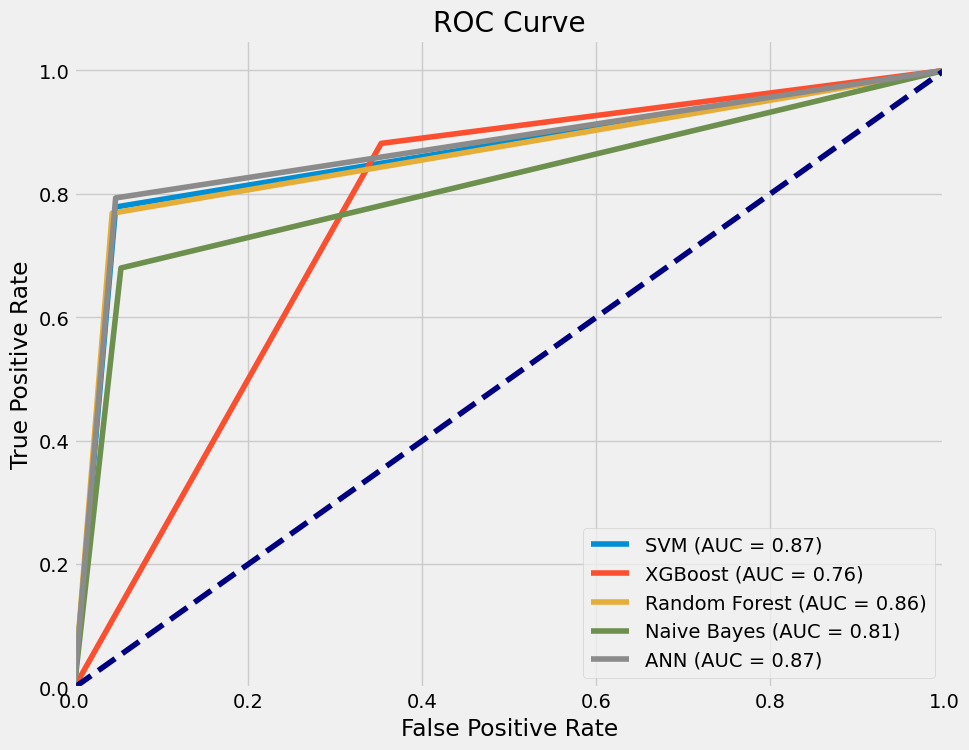

Area under the Curve (AUC) for each model:
SVM: 0.8656018597070714
XGBoost: 0.7645345225399099
Random Forest: 0.8625440294453018
Naive Bayes: 0.8131194509639008
ANN: 0.8729364714040992


In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for each model
models_roc_auc = {}
plt.figure(figsize=(10, 8))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(Y_test, y_pred_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
models_roc_auc['SVM'] = roc_auc_svm
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)

# XGBoost
fpr_xg, tpr_xg, _ = roc_curve(Y_test, y_pred_xg)
roc_auc_xg = auc(fpr_xg, tpr_xg)
models_roc_auc['XGBoost'] = roc_auc_xg
plt.plot(fpr_xg, tpr_xg, label='XGBoost (AUC = %0.2f)' % roc_auc_xg)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
models_roc_auc['Random Forest'] = roc_auc_rf
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(Y_test, y_pred_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)
models_roc_auc['Naive Bayes'] = roc_auc_gnb
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes (AUC = %0.2f)' % roc_auc_gnb)

# ANN
fpr_ann, tpr_ann, _ = roc_curve(Y_test, y_pred_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)
models_roc_auc['ANN'] = roc_auc_ann
plt.plot(fpr_ann, tpr_ann, label='ANN (AUC = %0.2f)' % roc_auc_ann)

# Plotting ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC for each model
print("Area under the Curve (AUC) for each model:")
for model, auc_score in models_roc_auc.items():
    print(f"{model}: {auc_score}")

The interpretation of the Area under the Curve (AUC) for each model:

1.SVM: The SVM model achieved an AUC of approximately 0.87. This indicates that the SVM model has good discrimination ability, with an 87% chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.

2.XGBoost: The XGBoost model obtained an AUC of around 0.76. Although it's lower compared to other models, it still suggests acceptable discrimination performance, with a 76% chance of correct ranking.

3.Random Forest: The Random Forest model achieved an AUC of approximately 0.86, indicating strong discrimination ability, with an 86% chance of correct ranking.

4.Naive Bayes: The Naive Bayes model yielded an AUC of about 0.81, suggesting reasonable discrimination performance, with an 81% chance of correct ranking.

5.ANN: The Artificial Neural Network (ANN) model obtained the highest AUC of approximately 0.87, indicating excellent discrimination ability, with an 87% chance of correct ranking.

In summary, the SVM, Random Forest, and ANN models demonstrate superior discrimination ability compared to XGBoost and Naive Bayes, with the ANN model exhibiting the highest AUC among all the models.







In [68]:
# Define the range of values for each column
column_ranges = {
    "HighBP": "(0 for No, 1 for Yes)",
    "HighChol": "(0 for No, 1 for Yes)",
    "BMI": "(Numeric value, based on formula)",
    "Smoker": "(0 for No, 1 for Yes)",
    "Stroke": "(0 for No, 1 for Yes)",
    "HeartDiseaseorAttack": "(0 for No, 1 for Yes)",
    "PhysActivity": "(0 for No, 1 for Yes)",
    "HvyAlcoholConsump": "(0 for No, 1 for Yes)",
    "NoDocbcCost": "(0 for No, 1 for Yes)",
    "GenHlth": "(Range: 1-5)",
    "MentHlth": "(Numeric value between 0-30)",
    "PhysHlth": "(Numeric value between 0-30)",
    "DiffWalk": "(0 for No, 1 for Yes)",
    "Age": "(Range: 1-13)",
    "Education": "(Range: 1-6)",
    "Income": "(Range: 1-8)"
}

# Input new data
new_data = {}
for column in X.columns:
    new_value = input(f"Enter value for {column} {column_ranges[column]}: ")
    new_data[column] = float(new_value)

# Convert input data to DataFrame
new_df = pd.DataFrame([new_data])

# Predict using the trained model
predicted_diabetes = model_ann.predict(new_df)

# Print prediction result
if predicted_diabetes[0] >= 0.5:
    print("Based on our research model, it is predicted that you have a Diabetes status. We recommend you see a doctor soon.")
else:
    print("Based on our research model, it is predicted that you do <b>not</b> have a Diabetes status. Enjoy your life.")

Enter value for HighBP (0 for No, 1 for Yes): 0
Enter value for HighChol (0 for No, 1 for Yes): 0
Enter value for BMI (Numeric value): 23
Enter value for Smoker (0 for No, 1 for Yes): 0
Enter value for Stroke (0 for No, 1 for Yes): 0
Enter value for HeartDiseaseorAttack (0 for No, 1 for Yes): 1
Enter value for PhysActivity (0 for No, 1 for Yes): 1
Enter value for HvyAlcoholConsump (0 for No, 1 for Yes): 0
Enter value for NoDocbcCost (0 for No, 1 for Yes): 0
Enter value for GenHlth (Range: 1-5): 4
Enter value for MentHlth (Numeric value): 20
Enter value for PhysHlth (Numeric value): 25
Enter value for DiffWalk (0 for No, 1 for Yes): 0
Enter value for Age (Range: 1-13): 7
Enter value for Education (Range: 1-6): 5
Enter value for Income (Range: 1-8): 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Based on our research model, it is predicted that you have a Diabetes status. We recommend you see a doctor soon.
